<h2>Initial Data Cleaning</h2>
<p1>
1) Using json file to add the category column to the data replacing the category Id column<br>

2) Check the data types of all the variable if they are appropriate for analysis<br>

3) Converting the two columns publishedAt and trending_date to datetime<br>

4) Check and take care of missing values. If column like "description" have missing values we can replace it by "No Description Provided"</p1>

<h2>Framing Questions for Analysis</h2>
<p1>
    
1)Group by Channel Title and find top channels with Views, Likes, Dislikes and Comments<br>

2)Group by Channel Category and find top channels with Views, Likes, Dislikes and Comments and bottom channels as well<br>

3)Which Category Videos are being watched and are in trending for most of the times? (Categories such as: Movies, Education,Videoblogging, etc)<br>

4)What's the average time taken for a video to be in trending categorically?<br>

5)What's the average no.of views required to enter into trending?<br>

6)Which Youtube channel in India has more videos in Trending?<br>

7)Understanding the significance of Likes,Dislikes and Comment</p1>

In [206]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [207]:
categories = pd.read_json("IN_category_id.json")

In [208]:
categories.head()

,kind,etag,items
0,youtube#videoCategoryListResponse,kBCr3I9kLHHU79W4Ip5196LDptI,"{'kind': 'youtube#videoCategory', 'etag': 'IfW..."
1,youtube#videoCategoryListResponse,kBCr3I9kLHHU79W4Ip5196LDptI,"{'kind': 'youtube#videoCategory', 'etag': '5XG..."
2,youtube#videoCategoryListResponse,kBCr3I9kLHHU79W4Ip5196LDptI,"{'kind': 'youtube#videoCategory', 'etag': 'HCj..."
3,youtube#videoCategoryListResponse,kBCr3I9kLHHU79W4Ip5196LDptI,"{'kind': 'youtube#videoCategory', 'etag': 'ra8..."
4,youtube#videoCategoryListResponse,kBCr3I9kLHHU79W4Ip5196LDptI,"{'kind': 'youtube#videoCategory', 'etag': '7mq..."


In [209]:
categories['items'][0]['snippet']['title']

'Film & Animation'

In [210]:
#Creating dictionary for json file provided for category and category id
category_dict = {}
for i in categories['items']:
    category_dict[i['id']] = i['snippet']['title']

In [211]:
category_dict

{'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

In [212]:
#Reading the data 
df = pd.read_csv("IN_youtube_trending_data.csv")

In [213]:
df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-12T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,9885899,224925,3979409,350210,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...
1,x-KbnJ9fvJc,Kya Baat Aa : Karan Aujla (Official Video) Tan...,2020-08-11T09:00:11Z,UCm9SZAl03Rev9sFwloCdz1g,Rehaan Records,10,2020-08-12T00:00:00Z,[None],11308046,655450,33242,405146,https://i.ytimg.com/vi/x-KbnJ9fvJc/default.jpg,False,False,Singer/Lyrics: Karan Aujla Feat Tania Music/ D...
2,KX06ksuS6Xo,Diljit Dosanjh: CLASH (Official) Music Video |...,2020-08-11T07:30:02Z,UCZRdNleCgW-BGUJf-bbjzQg,Diljit Dosanjh,10,2020-08-12T00:00:00Z,clash diljit dosanjh|diljit dosanjh|diljit dos...,9140911,296533,6179,30058,https://i.ytimg.com/vi/KX06ksuS6Xo/default.jpg,False,False,CLASH official music video performed by DILJIT...
3,UsMRgnTcchY,Dil Ko Maine Di Kasam Video | Amaal M Ft.Ariji...,2020-08-10T05:30:49Z,UCq-Fj5jknLsUf-MWSy4_brA,T-Series,10,2020-08-12T00:00:00Z,hindi songs|2020 hindi songs|2020 new songs|t-...,23564512,743931,84162,136942,https://i.ytimg.com/vi/UsMRgnTcchY/default.jpg,False,False,Gulshan Kumar and T-Series presents Bhushan Ku...
4,WNSEXJJhKTU,"Baarish (Official Video) Payal Dev,Stebin Ben ...",2020-08-11T05:30:13Z,UCye6Oz0mg46S362LwARGVcA,VYRLOriginals,10,2020-08-12T00:00:00Z,VYRL Original|Mohsin Khan|Shivangi Joshi|Payal...,6783649,268817,8798,22984,https://i.ytimg.com/vi/WNSEXJJhKTU/default.jpg,False,False,VYRL Originals brings to you ‘Baarish’ - the b...


In [214]:
df.describe()

,categoryId,view_count,likes,dislikes,comment_count
count,152593.000000,1.525930e+05,1.525930e+05,1.525930e+05,1.525930e+05
mean,20.928005,3.148897e+06,1.695163e+05,3.842192e+03,9.988589e+03
std,5.958950,7.553347e+06,4.454034e+05,9.236131e+04,8.708685e+04
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,20.000000,4.568570e+05,1.737800e+04,0.000000e+00,4.080000e+02
50%,24.000000,1.100973e+06,5.066700e+04,3.830000e+02,1.330000e+03
75%,24.000000,2.801690e+06,1.464980e+05,1.931000e+03,4.613000e+03
max,29.000000,2.644074e+08,1.611524e+07,1.234147e+07,6.738565e+06


In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152593 entries, 0 to 152592
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   video_id           152593 non-null  object
 1   title              152593 non-null  object
 2   publishedAt        152593 non-null  object
 3   channelId          152593 non-null  object
 4   channelTitle       152592 non-null  object
 5   categoryId         152593 non-null  int64 
 6   trending_date      152593 non-null  object
 7   tags               152593 non-null  object
 8   view_count         152593 non-null  int64 
 9   likes              152593 non-null  int64 
 10  dislikes           152593 non-null  int64 
 11  comment_count      152593 non-null  int64 
 12  thumbnail_link     152593 non-null  object
 13  comments_disabled  152593 non-null  bool  
 14  ratings_disabled   152593 non-null  bool  
 15  description        135820 non-null  object
dtypes: bool(2), int64(5)

In [216]:
#Let's check the no.of records for a random video: UsMRgnTcchY
df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-12T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,9885899,224925,3979409,350210,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...
1,x-KbnJ9fvJc,Kya Baat Aa : Karan Aujla (Official Video) Tan...,2020-08-11T09:00:11Z,UCm9SZAl03Rev9sFwloCdz1g,Rehaan Records,10,2020-08-12T00:00:00Z,[None],11308046,655450,33242,405146,https://i.ytimg.com/vi/x-KbnJ9fvJc/default.jpg,False,False,Singer/Lyrics: Karan Aujla Feat Tania Music/ D...
2,KX06ksuS6Xo,Diljit Dosanjh: CLASH (Official) Music Video |...,2020-08-11T07:30:02Z,UCZRdNleCgW-BGUJf-bbjzQg,Diljit Dosanjh,10,2020-08-12T00:00:00Z,clash diljit dosanjh|diljit dosanjh|diljit dos...,9140911,296533,6179,30058,https://i.ytimg.com/vi/KX06ksuS6Xo/default.jpg,False,False,CLASH official music video performed by DILJIT...
3,UsMRgnTcchY,Dil Ko Maine Di Kasam Video | Amaal M Ft.Ariji...,2020-08-10T05:30:49Z,UCq-Fj5jknLsUf-MWSy4_brA,T-Series,10,2020-08-12T00:00:00Z,hindi songs|2020 hindi songs|2020 new songs|t-...,23564512,743931,84162,136942,https://i.ytimg.com/vi/UsMRgnTcchY/default.jpg,False,False,Gulshan Kumar and T-Series presents Bhushan Ku...
4,WNSEXJJhKTU,"Baarish (Official Video) Payal Dev,Stebin Ben ...",2020-08-11T05:30:13Z,UCye6Oz0mg46S362LwARGVcA,VYRLOriginals,10,2020-08-12T00:00:00Z,VYRL Original|Mohsin Khan|Shivangi Joshi|Payal...,6783649,268817,8798,22984,https://i.ytimg.com/vi/WNSEXJJhKTU/default.jpg,False,False,VYRL Originals brings to you ‘Baarish’ - the b...


In [217]:
df[df.video_id=="WNSEXJJhKTU"]

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
4,WNSEXJJhKTU,"Baarish (Official Video) Payal Dev,Stebin Ben ...",2020-08-11T05:30:13Z,UCye6Oz0mg46S362LwARGVcA,VYRLOriginals,10,2020-08-12T00:00:00Z,VYRL Original|Mohsin Khan|Shivangi Joshi|Payal...,6783649,268817,8798,22984,https://i.ytimg.com/vi/WNSEXJJhKTU/default.jpg,False,False,VYRL Originals brings to you ‘Baarish’ - the b...
176,WNSEXJJhKTU,"Baarish (Official Video) Payal Dev,Stebin Ben ...",2020-08-11T05:30:13Z,UCye6Oz0mg46S362LwARGVcA,VYRLOriginals,10,2020-08-13T00:00:00Z,VYRL Original|Mohsin Khan|Shivangi Joshi|Payal...,11371796,325033,12340,25648,https://i.ytimg.com/vi/WNSEXJJhKTU/default.jpg,False,False,VYRL Originals brings to you ‘Baarish’ - the b...
362,WNSEXJJhKTU,"Baarish (Official Video) Payal Dev,Stebin Ben ...",2020-08-11T05:30:13Z,UCye6Oz0mg46S362LwARGVcA,VYRLOriginals,10,2020-08-14T00:00:00Z,VYRL Original|Mohsin Khan|Shivangi Joshi|Payal...,15784172,362450,14287,27392,https://i.ytimg.com/vi/WNSEXJJhKTU/default.jpg,False,False,VYRL Originals brings to you ‘Baarish’ - the b...
565,WNSEXJJhKTU,"Baarish (Official Video) Payal Dev,Stebin Ben ...",2020-08-11T05:30:13Z,UCye6Oz0mg46S362LwARGVcA,VYRLOriginals,10,2020-08-15T00:00:00Z,VYRL Original|Mohsin Khan|Shivangi Joshi|Payal...,17661754,383399,15127,28431,https://i.ytimg.com/vi/WNSEXJJhKTU/default.jpg,False,False,VYRL Originals brings to you ‘Baarish’ - the b...
774,WNSEXJJhKTU,"Baarish (Official Video) Payal Dev,Stebin Ben ...",2020-08-11T05:30:13Z,UCye6Oz0mg46S362LwARGVcA,VYRLOriginals,10,2020-08-16T00:00:00Z,VYRL Original|Mohsin Khan|Shivangi Joshi|Payal...,20266379,416168,16877,30192,https://i.ytimg.com/vi/WNSEXJJhKTU/default.jpg,False,False,VYRL Originals brings to you ‘Baarish’ - the b...
1007,WNSEXJJhKTU,"Baarish (Official Video) Payal Dev,Stebin Ben ...",2020-08-11T05:30:13Z,UCye6Oz0mg46S362LwARGVcA,VYRLOriginals,10,2020-08-17T00:00:00Z,VYRL Original|Mohsin Khan|Shivangi Joshi|Payal...,22201672,456343,19244,33140,https://i.ytimg.com/vi/WNSEXJJhKTU/default.jpg,False,False,VYRL Originals brings to you ‘Baarish’ - the b...
1243,WNSEXJJhKTU,"Baarish (Official Video) Payal Dev,Stebin Ben ...",2020-08-11T05:30:13Z,UCye6Oz0mg46S362LwARGVcA,VYRLOriginals,10,2020-08-18T00:00:00Z,VYRL Original|Mohsin Khan|Shivangi Joshi|Payal...,22585040,467144,19607,35028,https://i.ytimg.com/vi/WNSEXJJhKTU/default.jpg,False,False,VYRL Originals brings to you ‘Baarish’ - the b...


Same video can be there multiple times in dataset as the video can stay in trending for many consecutive days.
View Count,Likes and Dislikes Change as the time prolongs. So we shouldn't do group by on a Video_Id and add all the view_Counts,Likes,Dislikes as those will be repeated.

In [218]:
df.video_id.nunique()

46294

Though there are 152593: entries, no.of unique videos are: 46294

In [219]:
df.channelTitle.nunique()

4009

In [220]:
df.drop(["channelId","thumbnail_link"], inplace=True, axis=1)

In [221]:
#df_maxViews stores the last occurance of VideoID.
#Gathering final views,likes,comments before relegating from Trending data.

df_maxViews = df.sort_values('view_count', ascending=False).drop_duplicates(['video_id'])
df_maxViews

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description
52057,WMweEpGlu_U,BTS (방탄소년단) 'Butter' Official MV,2021-05-21T03:46:13Z,HYBE LABELS,10,2021-05-30T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,264407389,16021542,150990,6738565,False,False,BTS (방탄소년단) 'Butter' Official MV Credits: Dire...
3619,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21T03:58:10Z,Big Hit Labels,10,2020-08-30T00:00:00Z,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,253995993,16115240,756696,6249727,False,False,BTS (방탄소년단) 'Dynamite' Official MVCredits:Dire...
64049,DUwlGduupRI,Filhaal2 Mohabbat | Akshay Kumar Ft Nupur Sano...,2021-07-06T09:30:02Z,DM - Desi Melodies,10,2021-07-16T00:00:00Z,filhall 2|Filhaal 2|Filhaal|mohabbat|Mohabbat ...,202091414,3997842,122432,327015,False,False,"If 'Filhall' touched your heart, ‘Filhaal 2 - ..."
143385,gQlMMD8auMs,BLACKPINK - ‘Pink Venom’ M/V,2022-08-19T04:00:13Z,BLACKPINK,10,2022-08-25T00:00:00Z,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,187922090,11640133,0,3160681,False,False,BLACKPINK - ‘Pink Venom’ M/VKick in the door W...
4735,vRXZj0DzXIA,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,2020-08-28T04:00:11Z,BLACKPINK,10,2020-09-05T00:00:00Z,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,184778248,11795683,879354,2736021,False,False,BLACKPINK - ‘Ice Cream (with Selena Gomez)’Com...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18734,LbXoUwKcOzM,"TGT,PGT 2020 भर्ती विज्ञापन निरस्त नयी भर्ती व...",2020-11-18T16:17:36Z,Sanskritganga संस्कृतगंगा,27,2020-11-19T00:00:00Z,Live|sanskrit shikshan|live pd|sanskrit langua...,18149,929,35,84,False,False,#अनुवाद (रचनानुवादकौमुदी से) विनानुवादं नहि सा...
100230,KaEqvRET6uQ,19 January | Daily Current Affairs #22 | For -...,2022-01-19T02:25:01Z,SSC MAKER,27,2022-01-19T00:00:00Z,19 January | Daily Current Affairs #22 | For -...,18027,1465,0,56,False,False,19 January | Daily Current Affairs #22 | For -...
74296,BxOEj8ZeX2g,Tim Bergling's 32nd Birthday,2021-09-07T12:00:08Z,GoogleDoodles,1,2021-09-09T00:00:00Z,[None],0,0,0,0,True,True,Today's video Doodle celebrates the 32nd birth...
98652,Isim0ysZ6X4,Stephen Hawking's 80th Birthday,2022-01-07T18:40:13Z,GoogleDoodles,1,2022-01-11T00:00:00Z,[None],0,0,0,0,True,True,Today’s video Doodle celebrates one of history...


In [222]:
#df_minViews stores the data of a video entering into trending videos for the first time

df_minViews = df.sort_values('view_count', ascending=True).drop_duplicates(['video_id'])
df_minViews.sample(5)

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description
141704,0KRcHXO6W7I,Mogudu Pellam Lolli Part-15 || తిక్క కుదిరింది...,2022-08-16T07:03:23Z,BALRAJ AKKAM,22,2022-08-17T00:00:00Z,[None],141154,3755,0,13,False,False,@BALRAJ AKKAM Mogudu Pellam Lolli Part-15 || త...
143615,XcEB4aN31wk,Liger Movie REVIEW | Deeksha Sharma,2022-08-25T09:55:45Z,Filmi Indian,24,2022-08-26T00:00:00Z,liger|liger review|liger movie|liger trailer|h...,1218643,84754,0,5188,False,False,Liger Movie Review In Hindi By Deeksha Sharma....
148240,hLgsN2P6bMs,Flipkart & Amazon Sale Tips you should know! #...,2022-09-18T14:17:35Z,TECH-iELA Shorts,28,2022-09-19T00:00:00Z,[None],727947,86831,0,260,False,False,Flipkart Big Billion Days aur Amazon Great Ind...
132156,13SZHxn-lU0,M4 Tech Eating Tiger | ഇനി പുലിയിറച്ചി| Amazin...,2022-06-29T07:00:00Z,Harees Ameerali - Royal Sky Holidays,22,2022-06-30T00:00:00Z,malayalam travel videos|travel vlog malayalam|...,483326,31610,0,667,False,False,#tiger #m4tech #safariworld വ്യത്യസ്തമായ യാത്...
136261,VgSl05rTrEo,Maha-Monster Car Part-2 | लाखों का नुकसान हो ग...,2022-07-19T06:44:36Z,Crazy XYZ,28,2022-07-20T00:00:00Z,monster car part 2|tractor tyre in car|car wit...,1827959,207813,0,8321,False,False,"Hello guys, is video me humne monster car ke b..."


Appending the categories to all dataframes we used till now

In [223]:
def fetch_video_category(value):
    return categories['items'][value]['snippet']['title']

#add the categories to the various dataframes:
df_maxViews["Video_Category"]=df_maxViews.categoryId.apply(fetch_video_category)
df_minViews["Video_Category"]=df_minViews.categoryId.apply(fetch_video_category)
df["Video_Category"]=df.categoryId.apply(fetch_video_category)

In [224]:
df.sample(5)

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,Video_Category
71306,zHp7u2FdRSM,ശിവൻ തന്നെ ഹൽവ വാങ്ങിത്തരണമെന്ന് വാശിപിടിച്ച് ...,2021-08-23T14:00:20Z,Asianet,24,2021-08-24T00:00:00Z,Chippy|Popular serial Santhwanam|Rajeev Parame...,516294,11291,192,263,False,False,ശിവൻ തന്നെ ഹൽവ വാങ്ങിത്തരണമെന്ന് വാശിപിടിച്ച് ...,Foreign
100397,-joeZdDU1Gc,VYAH (Official Video)- VARINDER BRAR | Latest ...,2022-01-17T07:30:13Z,Varinder Brar,10,2022-01-20T00:00:00Z,varinder brar|varinder|brar|new punjabi songs ...,1291400,79912,0,2000,False,False,Hope You all will show your love and support. ...,Comedy
29442,X1zel3htdYo,Braat : Guri (Full Song) Sharry Nexus | Latest...,2021-01-13T12:30:05Z,Geet MP3,10,2021-01-18T00:00:00Z,geet mp3|gk digital|latest punjabi songs|new p...,3252835,215152,4005,11765,False,False,Geet MP3 & GK Digital Presenting Official Song...,Comedy
17457,lry-gRTRAaw,सरकारी स्कूल के छात्र || Sukki Dc || We Are One,2020-11-08T10:41:04Z,We Are One,23,2020-11-12T00:00:00Z,[None],1326044,80572,2595,4213,False,False,Earn With Me On Binany💰 https://bit.ly/3k4IRlV...,Family
70767,_n7QKzn25SU,"Taliban: Afghan మహిళలు ఉద్యోగాలు చేయొచ్చు, చదు...",2021-08-18T02:00:06Z,BBC News Telugu,25,2021-08-21T00:00:00Z,Taliban|Afghanistan|Afghanistan crisis|Women|I...,352184,4872,273,646,False,False,మా పాలనలో ఆడవాళ్లకు హక్కులుంటాయి... కానీ షరియా...,Horror


In [225]:
#Let's see the total count of videos with respect to Categories
df.Video_Category.value_counts()

Foreign                 58179
Comedy                  28725
Drama                   25269
Family                  12640
Shorts                   5286
Sci-Fi/Fantasy           5029
Horror                   4373
Anime/Animation          4191
Thriller                 3544
Autos & Vehicles         3347
Classics                  956
Music                     894
Science & Technology       87
Shows                      73
Name: Video_Category, dtype: int64

In [226]:
#Converting two date time columns to appropriate formats
df['publishedAt'] = pd.to_datetime(df['publishedAt'])
df['trending_date'] = pd.to_datetime(df['trending_date'])

In [227]:
#Checking for null or missing values present in the data - category and channelTitle
df.isnull().sum()

video_id                 0
title                    0
publishedAt              0
channelTitle             1
categoryId               0
trending_date            0
tags                     0
view_count               0
likes                    0
dislikes                 0
comment_count            0
comments_disabled        0
ratings_disabled         0
description          16773
Video_Category           0
dtype: int64

In [228]:
#Taking care of category and channelTitle columns as "other" if missing
df['channelTitle'] = df['channelTitle'].fillna("Other")
df['description'] = df['description'].fillna('No description provided') 

In [229]:
df.isnull().sum()

video_id             0
title                0
publishedAt          0
channelTitle         0
categoryId           0
trending_date        0
tags                 0
view_count           0
likes                0
dislikes             0
comment_count        0
comments_disabled    0
ratings_disabled     0
description          0
Video_Category       0
dtype: int64

In [230]:
#df = df.drop_duplicates('title',keep='last')

<h3>Channel With The Most View Count

In [231]:
df_Views_Analysis = df_maxViews.groupby('Video_Category')["view_count"].sum().reset_index()
df_Like = df_maxViews.groupby('Video_Category')["likes"].sum().reset_index()
df_Dislike = df_maxViews.groupby('Video_Category')["dislikes"].sum().reset_index()
df_Comments = df_maxViews.groupby('Video_Category')["comment_count"].sum().reset_index()
df_Views_Analysis["Likes"] = df_Like.likes
df_Views_Analysis["Dislikes"] = df_Dislike.dislikes
df_Views_Analysis

,Video_Category,view_count,Likes,Dislikes
0,Anime/Animation,3409452140,101326230,2255995
1,Autos & Vehicles,2882587134,93430979,3239950
2,Classics,557540087,40832359,321287
3,Comedy,34521044813,1822401152,36199371
4,Drama,20963188680,1330160004,11947340
5,Family,9694596165,642567874,7348410
6,Foreign,48004512563,2031051486,48974942
7,Horror,1533432090,29184442,3136659
8,Music,406558072,20035514,407200
9,Sci-Fi/Fantasy,2521392914,143084727,1975857


In [232]:
channel_group_df = df.groupby(by = df['channelTitle']).sum()

In [233]:
channel_group_df[channel_group_df['view_count'] == channel_group_df['view_count'].max()]

,categoryId,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled
channelTitle,,,,,,,
T-Series,7307,17086546781,526523333,19816336,36989139,0,1


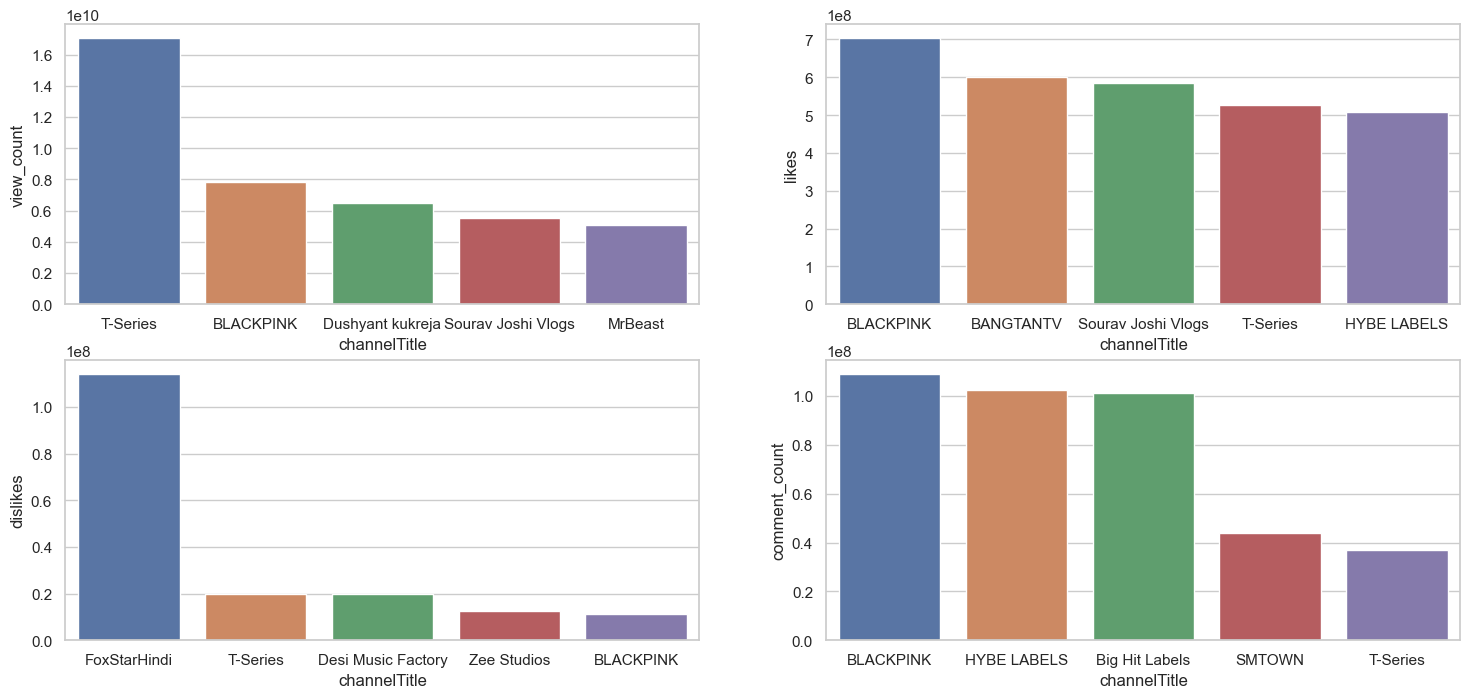

In [234]:
#Plotting the 5 channels with largest view count, likes, dislikes, comment_count
plt.figure(figsize = (18,8))
plt.subplot(2,2,1)

var_list = ['view_count','likes','dislikes','comment_count']

for i in range(0,4):
    plt.subplot(2,2,i+1)
    x = channel_group_df[var_list[i]].nlargest(5).index
    y = channel_group_df[var_list[i]].nlargest(5)
    sns.barplot(x = x,y = y)

<p1>T-series seems to be most viewed channel in India. Sourav Joshi vlogs are present in each of the top contenders of views,likes and comments.

FoxStarHindi leads the dislikes section reason being most disliked sadak 2 Movie trailer was from this channel. T-series with only being on in views not likes and comments finds itself in Disliked section.

Most of the disliked videos are coming from Entertainment type of Channels like movie production or music company channels.

BTS(Bangtan Sonyeondan - Korean Bulletproof Boy Scouts - Korean Pop Music Band) Channels are also leading in comments and likes with Korean girls channel Blackpink.

<h3>Most Watched Category

In [235]:
category_group_df = df.groupby(by = df['Video_Category']).sum()
category_group_df

,categoryId,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled
Video_Category,,,,,,,
Anime/Animation,71247,12256128274,372824316,8723701,18532219,12,5
Autos & Vehicles,3347,12107400329,401380575,18004648,20449204,23,27
Classics,18164,1523350741,113643780,1132093,3790575,5,3
Comedy,368790,144019437825,8126163621,177940950,914262141,57,200
Drama,555918,71303725669,4458096488,42504145,104804465,305,632
Family,290720,38038250623,2710583126,36232633,92097034,84,106
Foreign,1396296,162793384779,7475993010,254035180,274269626,501,350
Horror,109325,4734824310,94431618,11479834,10313938,187,344
Music,1788,1487988710,76711878,1575311,1281716,4,8


In [236]:
category_group_df[category_group_df['view_count'] == category_group_df['view_count'].max()]

,categoryId,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled
Video_Category,,,,,,,
Foreign,1396296,162793384779,7475993010,254035180,274269626,501,350


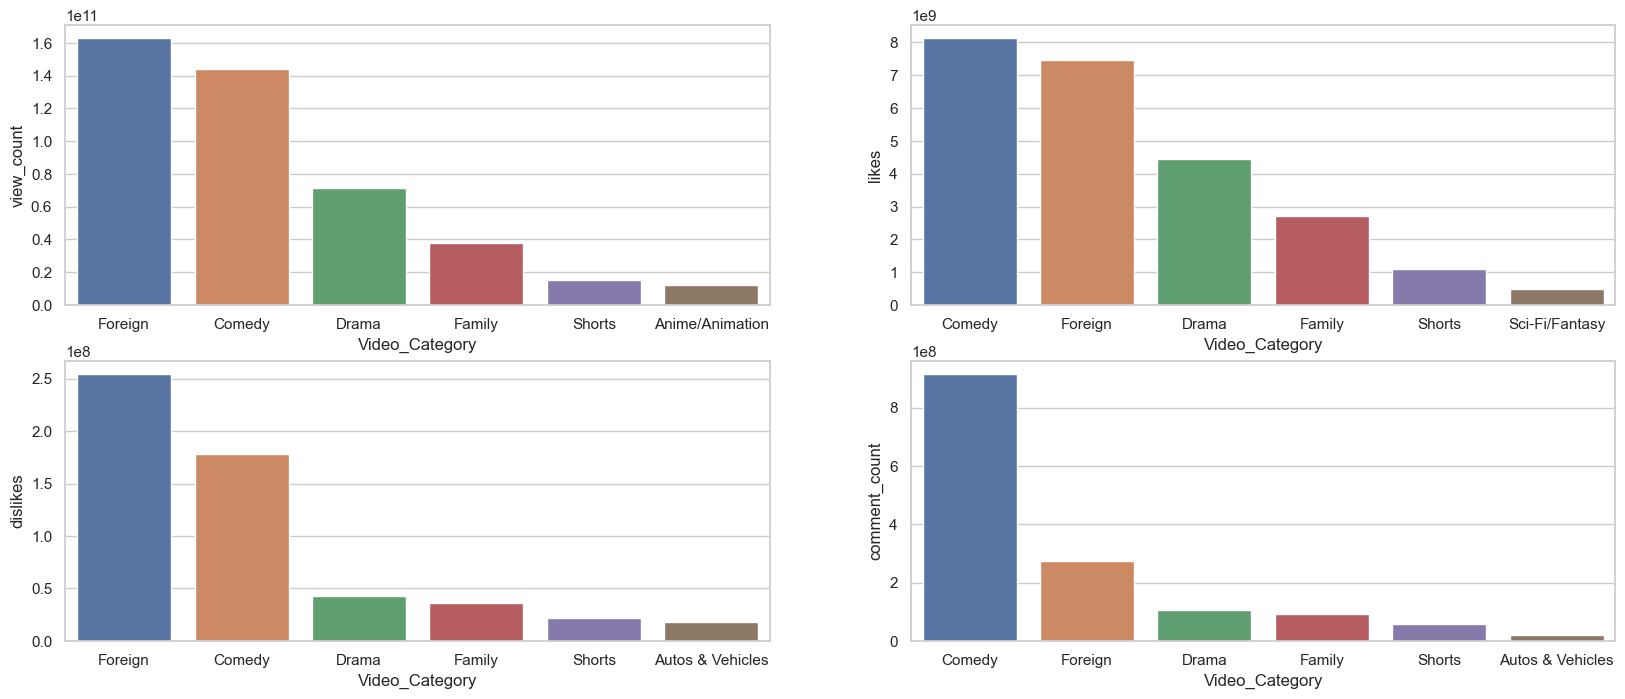

In [237]:
#Plotting the 5 categories with largest view count, likes, dislikes, comment_count}
plt.figure(figsize = (20,8))
plt.subplot(2,2,1)

var_list = ['view_count','likes','dislikes','comment_count']

for i in range(0,4):
    plt.subplot(2,2,i+1)
    x = category_group_df[var_list[i]].nlargest(6).index
    y = category_group_df[var_list[i]].nlargest(6)
    sns.barplot(x = x,y = y)

<h3>Least Watched Category

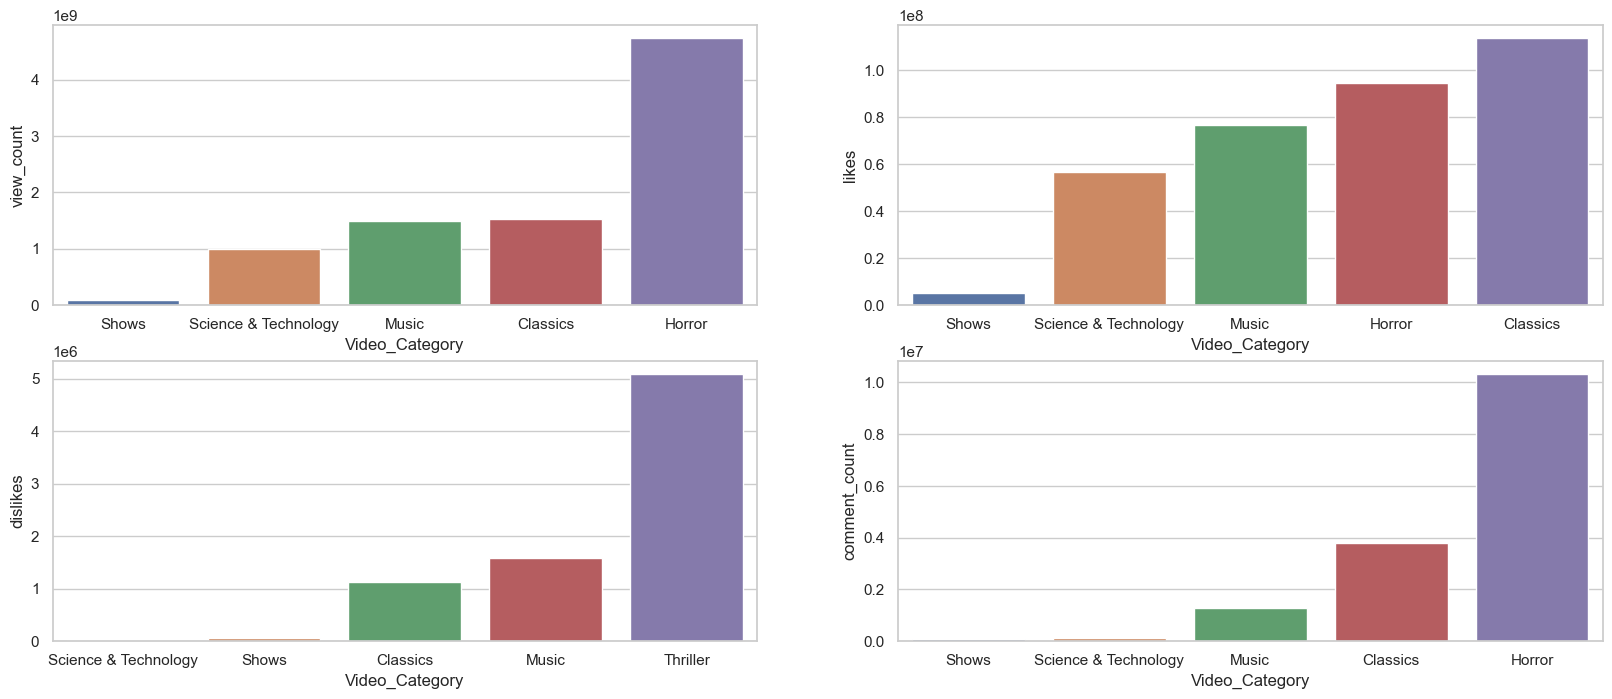

In [238]:
#Plotting the 5 Categories with smallest view count, likes, dislikes, comment_count 
plt.figure(figsize = (20,8))
plt.subplot(2,2,1)

var_list = ['view_count','likes','dislikes','comment_count']

for i in range(0,4):
    plt.subplot(2,2,i+1) 
    x = category_group_df[var_list[i]].nsmallest(5).index
    y = category_group_df[var_list[i]].nsmallest(5)
    sns.barplot(x = x,y = y)

<p1>Shows are the least watched category and least like as well

<h4>In most cases, viewers just watch the video and turn to other video without Liking/Disliking/Commenting. But if they responded to a video in like/comment/dislike then that does signifies something and we need to capture that.

Let's create a Response percentage column which signifies the public response to a video and engagement b/w viewers and the video

In [239]:
df_Views_Analysis["Response_Percentage"] = round((( df_Views_Analysis.Likes + df_Views_Analysis.Dislikes ) /df_Views_Analysis.view_count)* 100,2)

df_Views_Analysis

,Video_Category,view_count,Likes,Dislikes,Response_Percentage
0,Anime/Animation,3409452140,101326230,2255995,3.04
1,Autos & Vehicles,2882587134,93430979,3239950,3.35
2,Classics,557540087,40832359,321287,7.38
3,Comedy,34521044813,1822401152,36199371,5.38
4,Drama,20963188680,1330160004,11947340,6.40
5,Family,9694596165,642567874,7348410,6.70
6,Foreign,48004512563,2031051486,48974942,4.33
7,Horror,1533432090,29184442,3136659,2.11
8,Music,406558072,20035514,407200,5.03
9,Sci-Fi/Fantasy,2521392914,143084727,1975857,5.75


<h3>Public Response vs Type of Videos

Text(0, 0.5, 'Public Response(in percentage)')

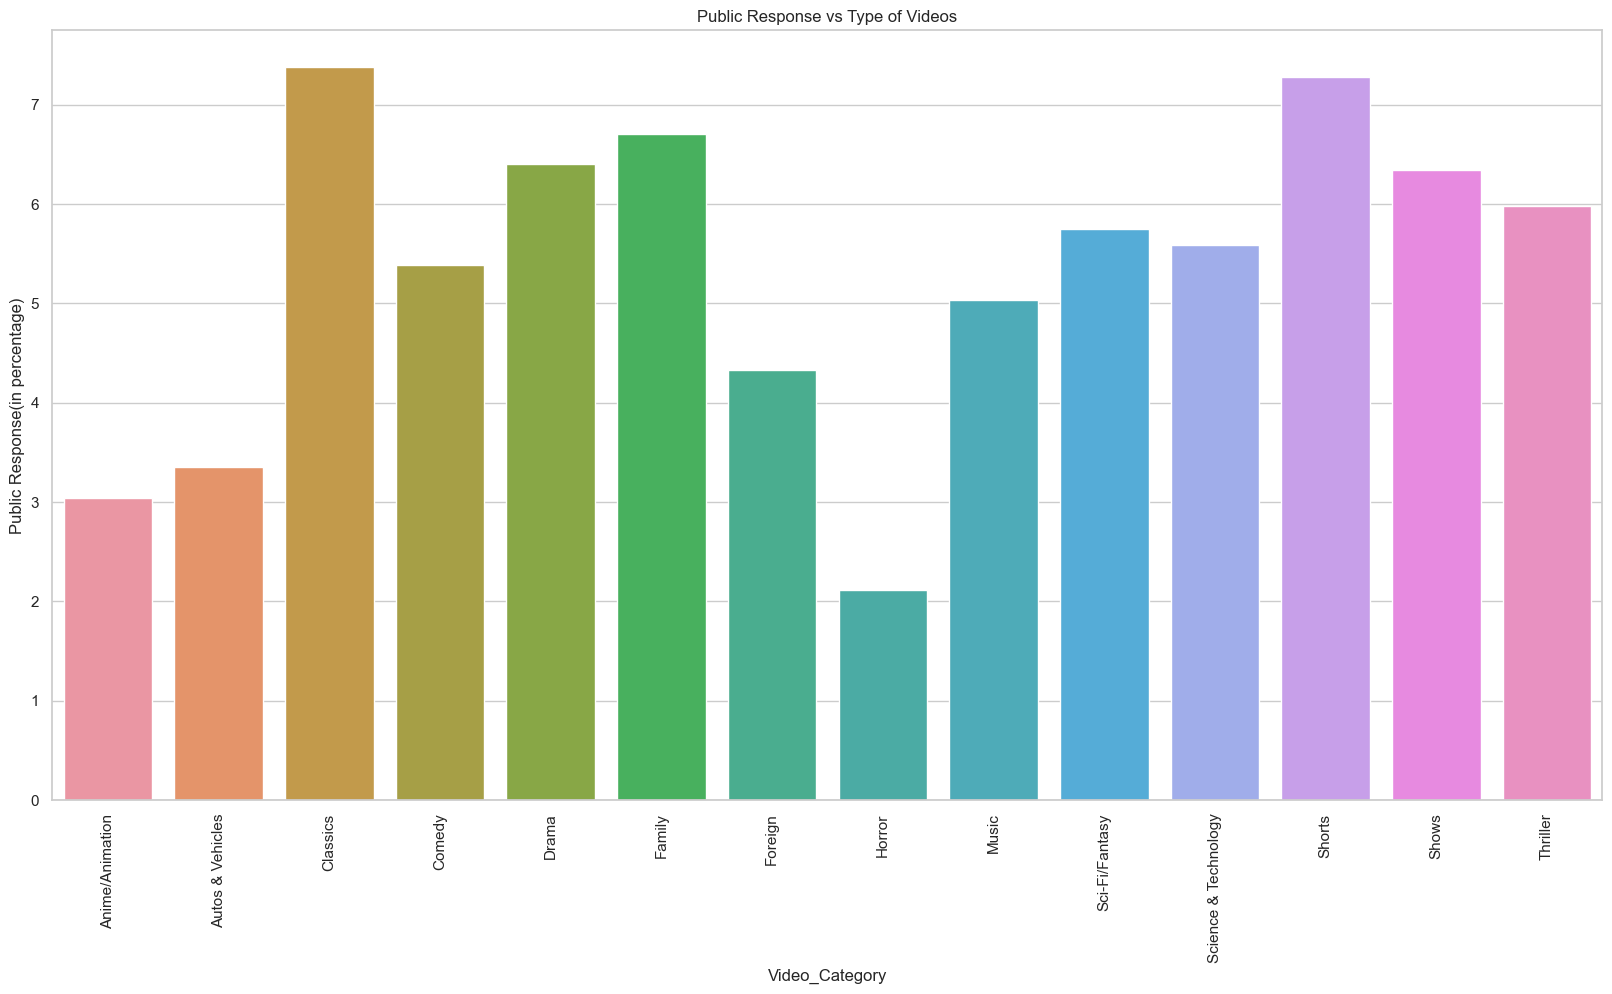

In [240]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("Public Response vs Type of Videos")
plt.xticks(rotation=90)

sns.barplot(x=df_Views_Analysis.Video_Category, y=df_Views_Analysis.Response_Percentage)

# Add label for vertical axis
plt.ylabel("Public Response(in percentage)")

<p1>We can see that Viewers are highly reacting to Classics, Drama, Family, Sports, Sci-fi/Fantacy Videos.

In [241]:
df_Views_Analysis["LikesPercentage"] = df_Views_Analysis.Likes*100/df_Views_Analysis.view_count
df_Views_Analysis["DislikesPercentage"] = df_Views_Analysis.Dislikes*100/df_Views_Analysis.view_count
df_Views_Analysis["Comments"] = df_Comments["comment_count"]
df_Views_Analysis["CommentsPercentage"] = df_Views_Analysis.Comments*100/df_Views_Analysis.view_count
df_Views_Analysis

,Video_Category,view_count,Likes,Dislikes,Response_Percentage,LikesPercentage,DislikesPercentage,Comments,CommentsPercentage
0,Anime/Animation,3409452140,101326230,2255995,3.04,2.971921,0.066169,4980619,0.146083
1,Autos & Vehicles,2882587134,93430979,3239950,3.35,3.241220,0.112397,4177745,0.144930
2,Classics,557540087,40832359,321287,7.38,7.323663,0.057626,1194838,0.214305
3,Comedy,34521044813,1822401152,36199371,5.38,5.279102,0.104862,176845011,0.512282
4,Drama,20963188680,1330160004,11947340,6.40,6.345218,0.056992,30713548,0.146512
5,Family,9694596165,642567874,7348410,6.70,6.628104,0.075799,17219247,0.177617
6,Foreign,48004512563,2031051486,48974942,4.33,4.230960,0.102022,62034194,0.129226
7,Horror,1533432090,29184442,3136659,2.11,1.903211,0.204552,3012019,0.196423
8,Music,406558072,20035514,407200,5.03,4.928082,0.100158,415788,0.102270
9,Sci-Fi/Fantasy,2521392914,143084727,1975857,5.75,5.674829,0.078364,3398208,0.134775


<AxesSubplot: xlabel='Video_Category'>

<Figure size 2000x1000 with 0 Axes>

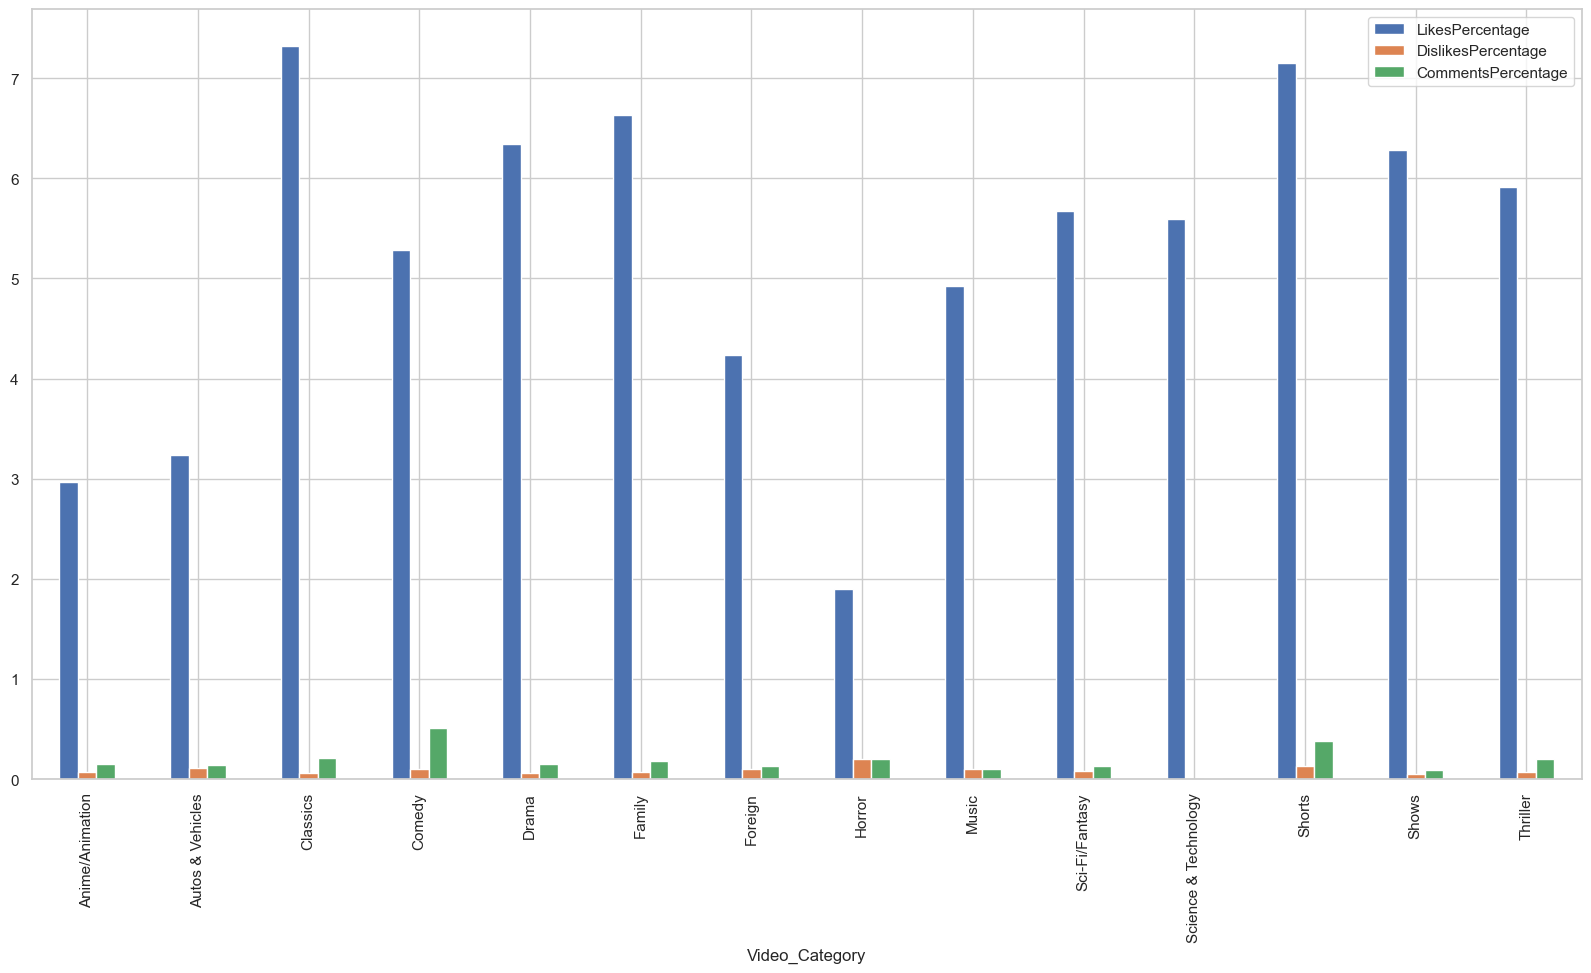

In [242]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))

df_Views_Analysis.plot(x="Video_Category", y=["LikesPercentage", "DislikesPercentage", "CommentsPercentage"], kind="bar",figsize=(20,10))

<h3>CommentsPercentage vs Type of Videos

Text(0, 0.5, 'Comments')

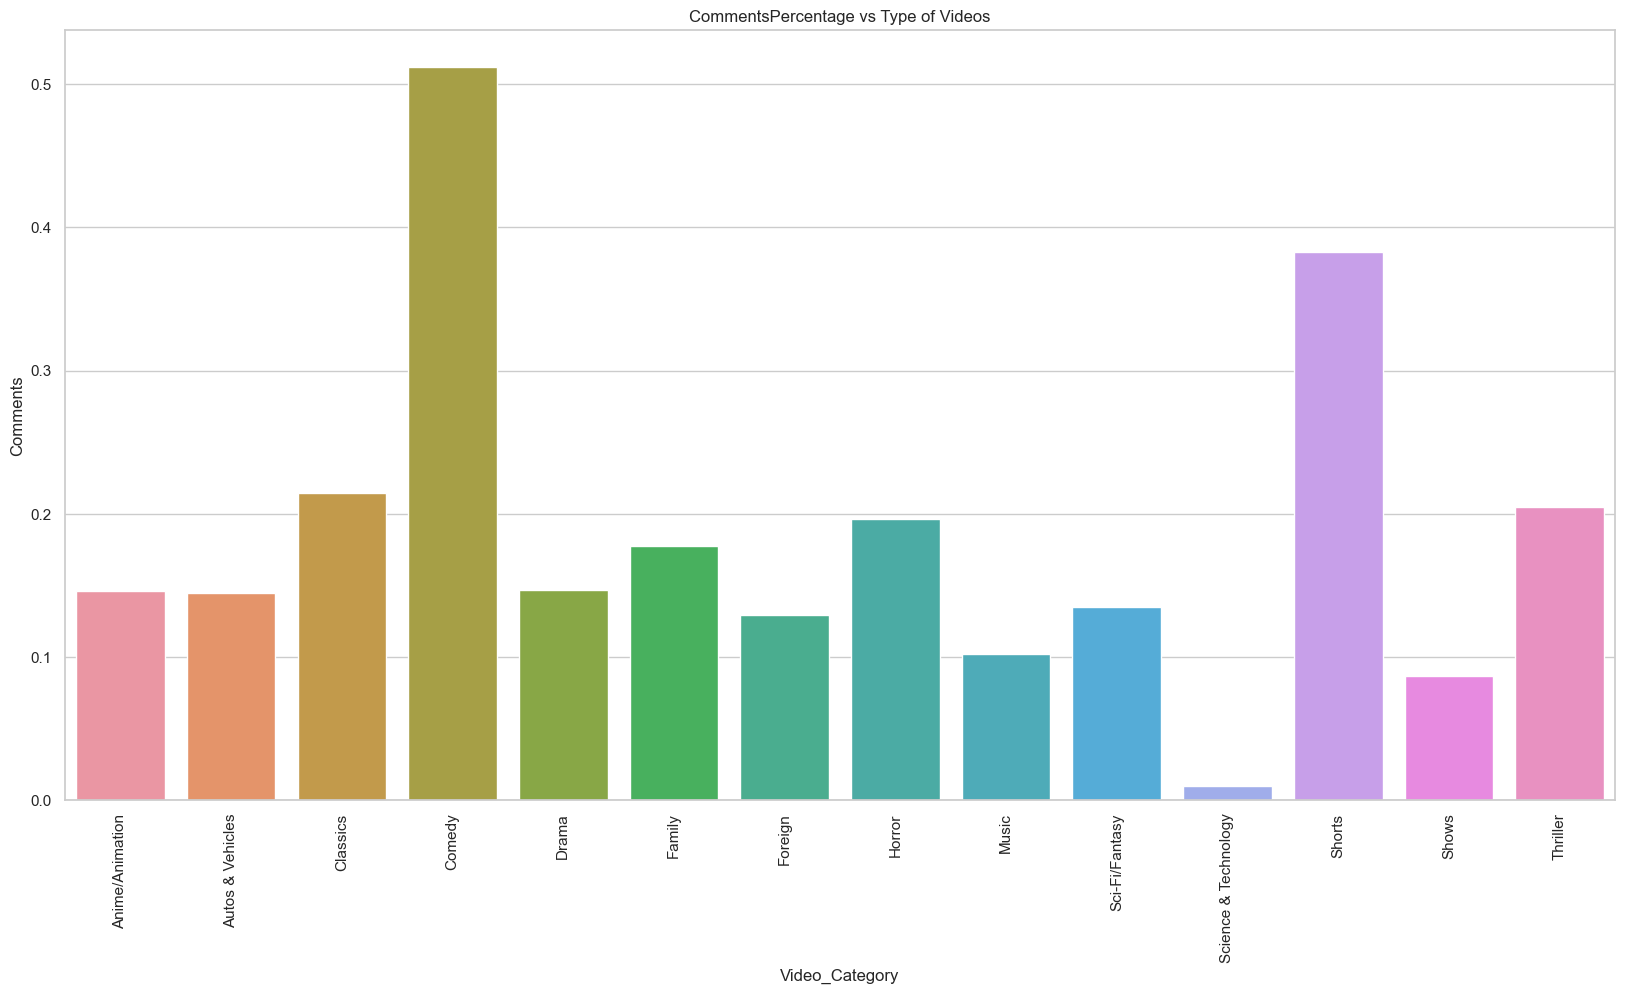

In [243]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("CommentsPercentage vs Type of Videos")
plt.xticks(rotation=90)

sns.barplot(x=df_Views_Analysis.Video_Category, y=df_Views_Analysis.CommentsPercentage)

# Add label for vertical axis
plt.ylabel("Comments")

<p1>Comedy and Shorts has the most comments.

<h3>DislikePercentage vs Type of Videos

Text(0, 0.5, 'Dislikes')

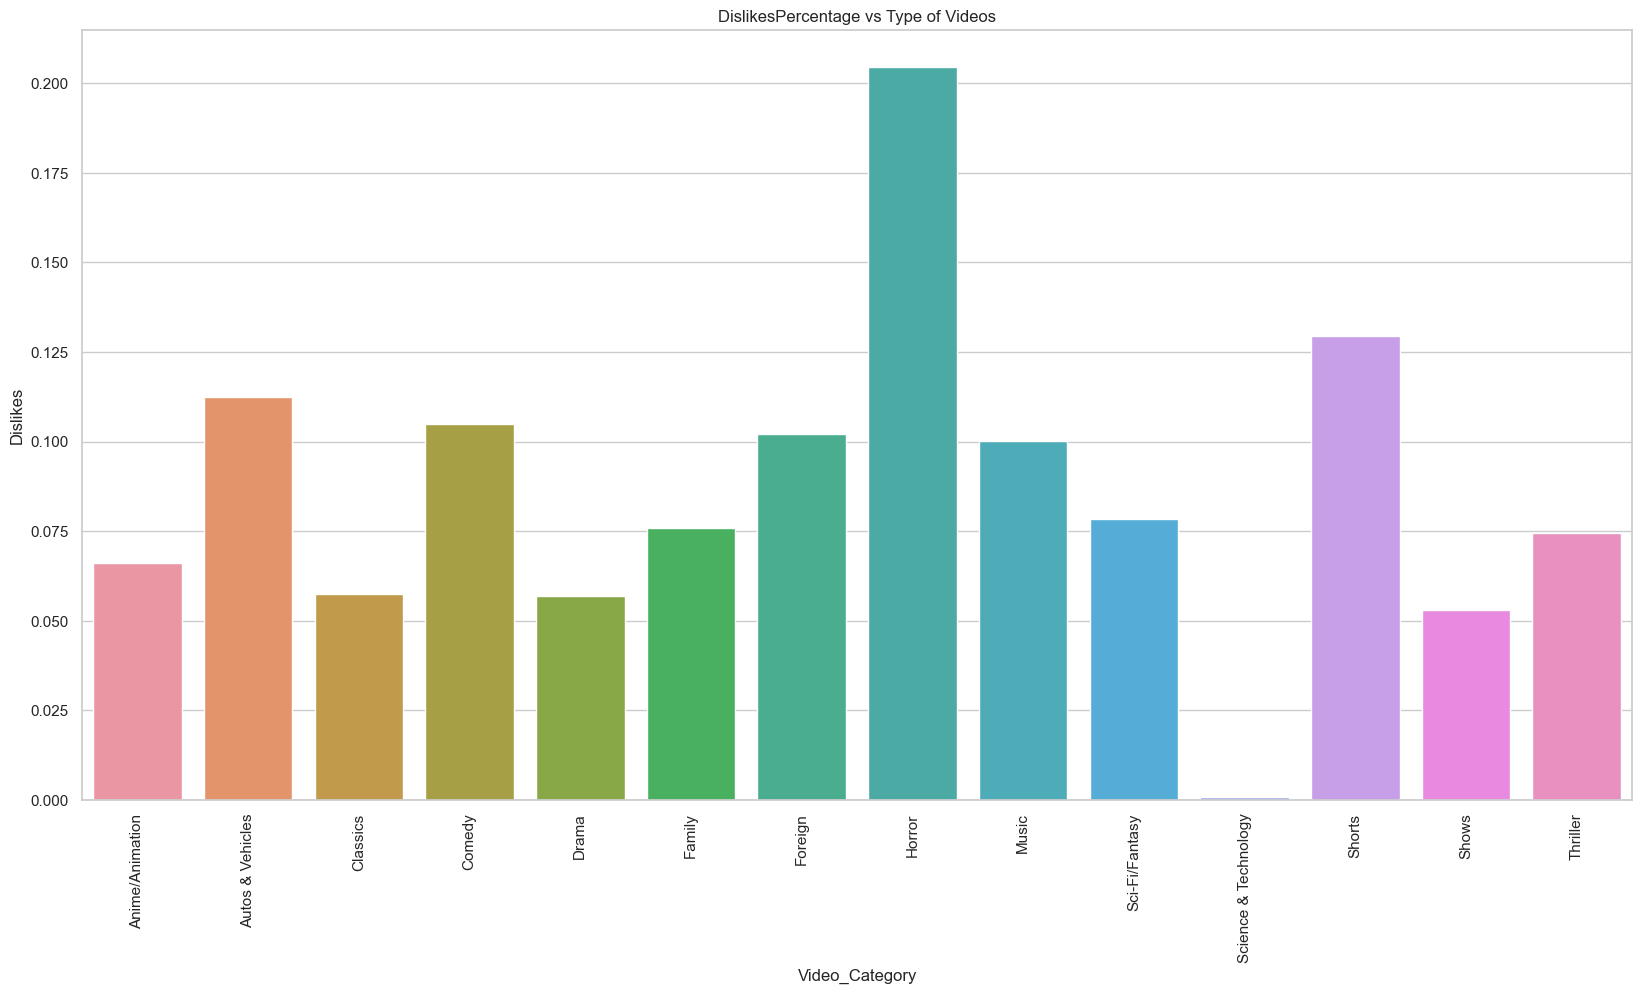

In [244]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)

# Add title
plt.title("DislikesPercentage vs Type of Videos")

sns.barplot(x=df_Views_Analysis.Video_Category, y=df_Views_Analysis.DislikesPercentage)

# Add label for vertical axis
plt.ylabel("Dislikes")

<p1>Horror movies seems to receive the most dislikes

<h3>LikesPercentage vs Type of Videos

Text(0, 0.5, 'Likes')

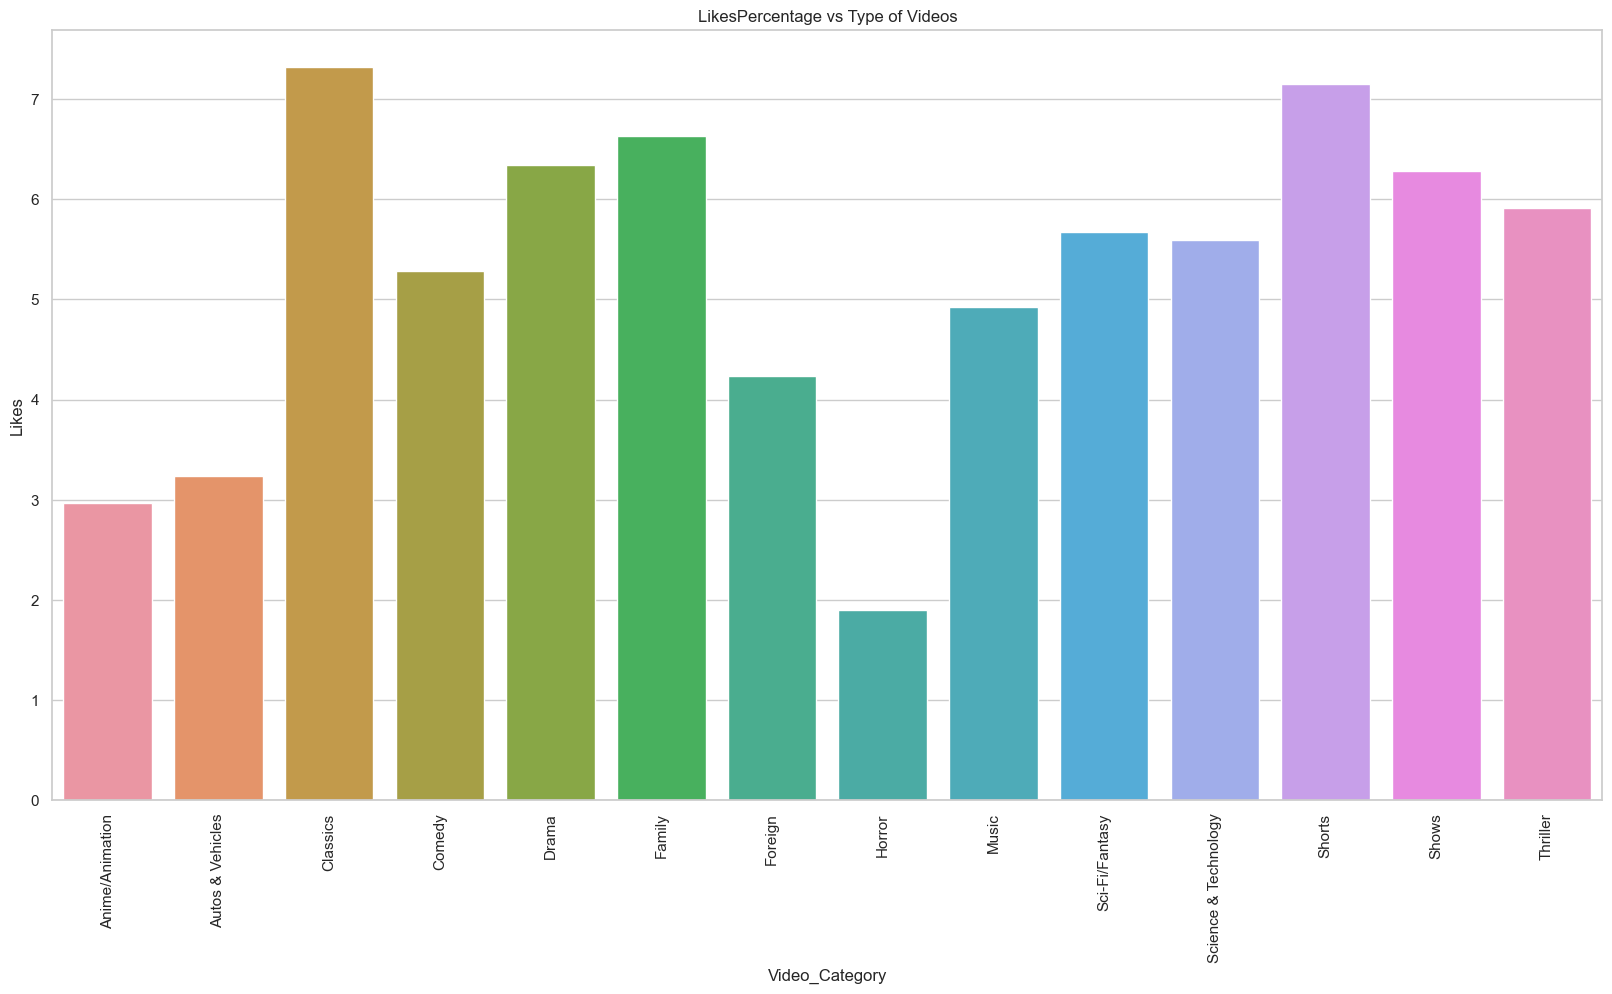

In [245]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)

# Add title
plt.title("LikesPercentage vs Type of Videos")

sns.barplot(x=df_Views_Analysis.Video_Category, y=df_Views_Analysis.LikesPercentage)

# Add label for vertical axis
plt.ylabel("Likes")

<p1>Classics, Shorts and Family movies seems to receive the most likes

<h3>Channel Analysis

In [246]:
df_Channel = df_maxViews.groupby('channelTitle')["view_count"].sum().reset_index()
df_Like = df_maxViews.groupby('channelTitle')["likes"].sum().reset_index()
df_Dislike = df_maxViews.groupby('channelTitle')["dislikes"].sum().reset_index()
df_Comments = df_maxViews.groupby('channelTitle')["comment_count"].sum().reset_index()
df_Channel["Likes"] = df_Like.likes
df_Channel["Dislikes"] = df_Dislike.dislikes
df_Channel["Comments"] = df_Comments.comment_count

df_Channel.sample(10)

,channelTitle,view_count,Likes,Dislikes,Comments
1900,Maroon5VEVO,4390875,173082,2564,6715
872,Dino James,21416793,3011923,21859,168595
2887,Sheethal And Vinu,17098595,861359,0,2086
1209,Govind Padmasoorya,2970877,149839,2365,4927
2451,Puthiyathalaimurai TV,14522455,175516,11591,10405
2926,Shrutika Arjun,1535843,69409,0,60
3398,TheLazyBong,799930,145043,3169,7657
709,Cook With Parul,14635017,342884,12341,21062
413,B4U Motion Pictures,2148202,163870,823,7717
1394,IndianExpressOnline,4304100,92680,10174,6282


In [247]:
df_Channel.sort_values('view_count', ascending=False).iloc[:25,:]

,channelTitle,view_count,Likes,Dislikes,Comments
3174,T-Series,3605729251,96610966,3847392,6630604
3624,Vijay Television,2546942360,54654378,909236,3134836
3027,Sourav Joshi Vlogs,2248052445,223933074,1032729,10369759
915,Dushyant kukreja,1667219165,97914610,1859647,336732
442,BLACKPINK,1583164945,136256960,1912398,17694285
2042,MrBeast,1256389734,83415829,566834,4691285
726,Crazy XYZ,1213024080,105160576,2131297,6286459
174,Ajay Sharma,1092146916,55418519,1379520,92375
3009,Sony Music India,1020569225,22149631,1065808,2987260
1260,HYBE LABELS,1016062898,102838507,531216,20575336


<h3>Channel vs total Likes

Text(0, 0.5, 'Total Likes')

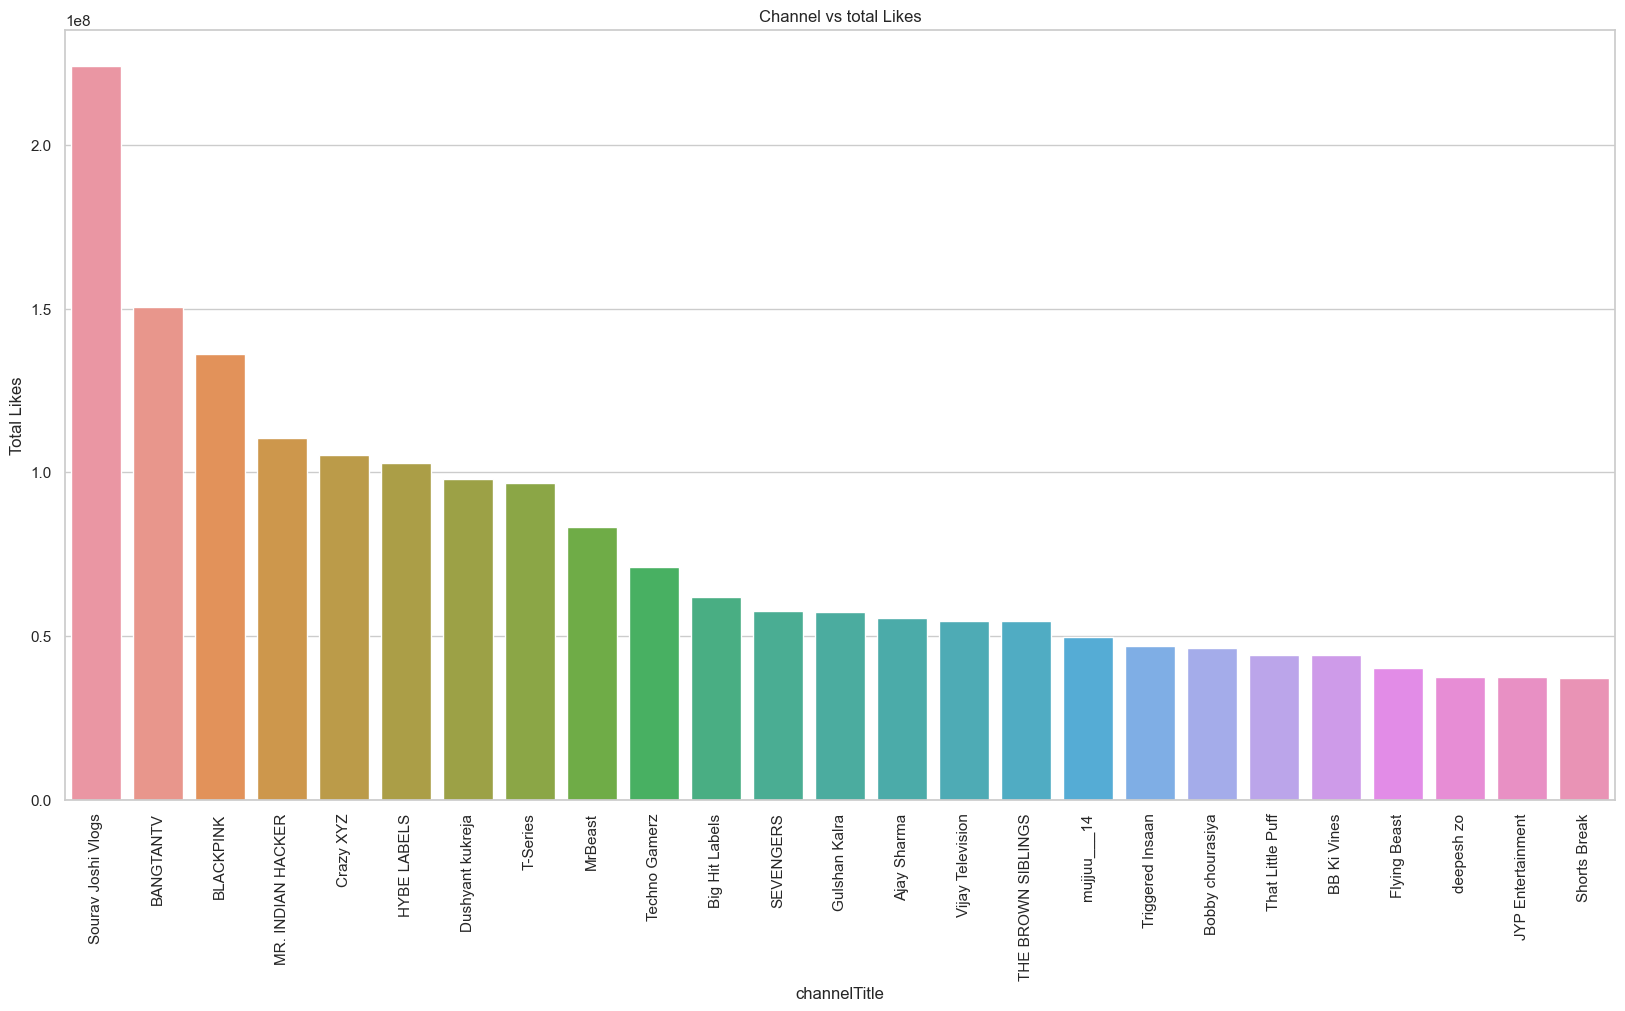

In [248]:
Channel_Views = df_Channel.sort_values('Likes', ascending=False).iloc[:25,:]
# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("Channel vs total Likes")
plt.xlabel
plt.xticks(rotation=90)

sns.barplot(x=Channel_Views.channelTitle, y=Channel_Views.Likes)

# Add label for vertical axis
plt.ylabel("Total Likes")


<h3>Channel vs total Comments

Text(0, 0.5, 'Total Comments')

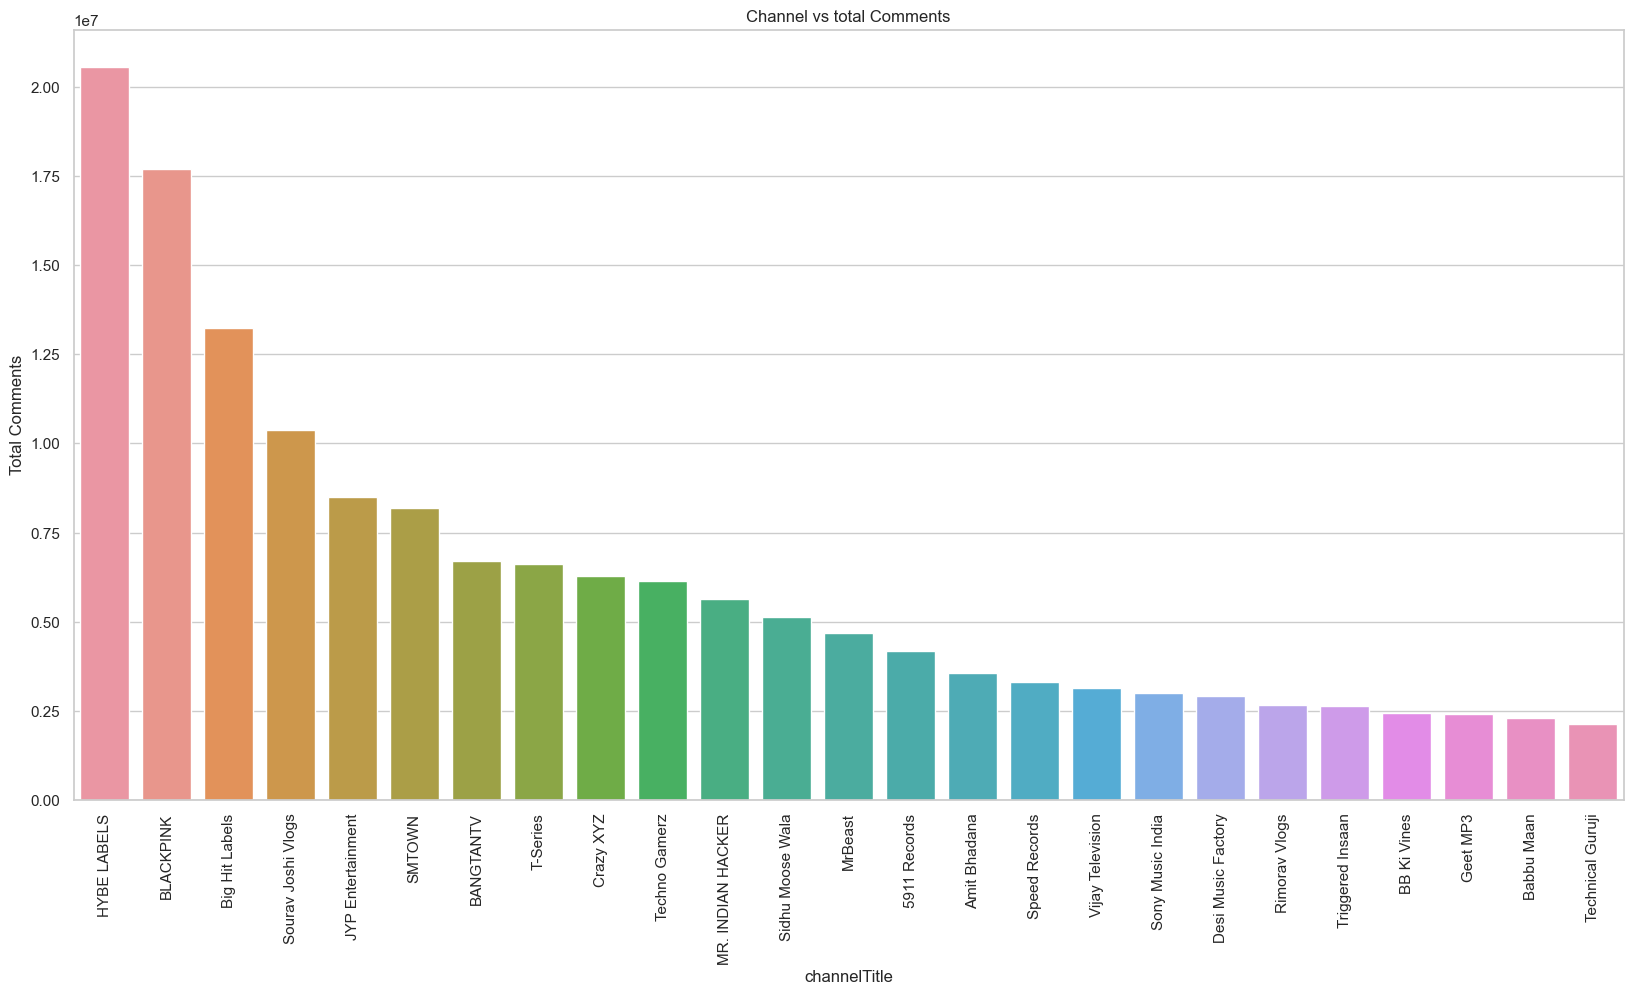

In [249]:
Channel_Views = df_Channel.sort_values('Comments', ascending=False).iloc[:25,:]
# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("Channel vs total Comments")
plt.xlabel
plt.xticks(rotation=90)

sns.barplot(x=Channel_Views.channelTitle, y=Channel_Views.Comments)

# Add label for vertical axis
plt.ylabel("Total Comments")

<h3>Days in trending

In [250]:
NoOfDaysInTrending = dict(df.groupby('video_id')['view_count'].count())
NoOfDaysInTrending

{'--9rRxqTdjQ': 4,
 '--GS_EPuuMc': 3,
 '--L_wDHUaxY': 4,
 '--WGlFF6-yw': 5,
 '--vmXGvtqxQ': 4,
 '--xmP5nOoLM': 1,
 '-00zRvr9zyA': 5,
 '-05Hay2JrKg': 1,
 '-0Da_UPrV10': 2,
 '-0PR_BkK60E': 1,
 '-0Qa7hB2vXI': 1,
 '-0SOJVfKX00': 5,
 '-0beFQnB5lY': 5,
 '-0gtaC4AzHA': 3,
 '-0ldvhBlL-k': 7,
 '-0oRa0QXx6I': 5,
 '-0udX1wZ82U': 2,
 '-0wc4B969z0': 4,
 '-13QFm5vAoY': 4,
 '-19EvIcr9ZA': 5,
 '-1EIBWRRj4U': 1,
 '-1ImKHHc7Ck': 5,
 '-1QZHe8x2G0': 6,
 '-1dLG2z61hQ': 2,
 '-1ddUMd4BRw': 2,
 '-1i1gagGtu4': 5,
 '-1kFl7EWFqs': 2,
 '-1lRI4dseeA': 2,
 '-1pQX88fnUQ': 5,
 '-28tVGVeM_Q': 3,
 '-29uvnpHjpI': 1,
 '-2CYiqoM3BA': 4,
 '-2DOCcpdTS0': 5,
 '-2RBOk_RzA0': 6,
 '-2RJTVPSOPc': 1,
 '-2WasASWxgo': 2,
 '-2_qmj_X04o': 3,
 '-2a-DFvWa0k': 3,
 '-2dqKYHewY0': 3,
 '-2draG1JbKA': 3,
 '-3AQa1eM_PU': 2,
 '-3A_ptUS5_g': 4,
 '-3HiGsaH4Ew': 5,
 '-3IcQ3RygGE': 2,
 '-3KzmJPgHu4': 3,
 '-3LbftaK6jM': 2,
 '-3XxzOSIvZ8': 5,
 '-3_fPBahI_0': 1,
 '-3z4u6AHBxg': 3,
 '-3zqU_Z6T3o': 4,
 '-47LcGA8Fp4': 4,
 '-4L_ZLzYdlU': 3,
 '-4escF5itQ

In [254]:
def fetch_video_times(value):
    return NoOfDaysInTrending[value]

In [257]:
df_maxViews["times_in_trending"] = df_maxViews.video_id.apply(fetch_video_times)
df_maxViews.sample(5)

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,Video_Category,times_in_trending
16270,QsOF-7-cbps,Jin & Johny | Episode 07 | തുറന്ന് വിടുമോ? | T...,2020-10-31T14:57:37Z,Alambanz,23,2020-11-05T00:00:00Z,alambanz|jin and johny|jin & johny|thaha thug|...,591726,40189,2328,2016,False,False,Buy Alpha Aryuvedha Fully Ayurvedic Weight Gai...,Family,5
112731,1Tqc-GPwFJU,'दिन-रात बस Officer बनने के बारे में सोचती थी'...,2022-03-20T12:42:42Z,जोश Talks,27,2022-03-23T00:00:00Z,uppsc|pcs officer|pcs|uppcs|pes officer|pes|aa...,332401,16636,0,614,False,False,जैसे Aarti Gupta ji ने सही Guidance से अपना Of...,Thriller,3
68282,1S00Cx0dV8M,"राजू को मिली नौकरी, वायरस की कटी मूंछ - 3 इडिय...",2021-08-05T05:30:48Z,Haste Raho,23,2021-08-07T00:00:00Z,3 idiots results scene|3 idiots comedy scene|3...,1008471,16565,734,356,False,False,"राजू को मिली नौकरी, वायरस की कटी मूंछ - 3 इडिय...",Family,2
42499,U2TbNrrJvbc,Gaani Yaar Di (Official Teaser) Nawab | Gurle...,2021-03-29T04:30:15Z,Expert Jatt,10,2021-03-30T00:00:00Z,latest|new|punjabi|songs|2020|gaani|yaar di|ga...,528608,24223,413,461,False,False,Expert Jatt Presents : Gaani Yaar Di (Official...,Comedy,1
147217,OFNIk2DOIGw,Ila arthamainda mummy ki😵‍💫 #kareenanaidu#ownv...,2022-09-07T04:20:16Z,KAREENA NAIDU,24,2022-09-13T00:00:00Z,[None],2041200,86527,0,130,False,False,NaN,Foreign,7


<p1>Top 25 Videos that are in trending for many days

In [258]:
df_trend_video_tt = df_maxViews.sort_values('times_in_trending', ascending=False).iloc[:25,:]
df_trend_video_tt

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,Video_Category,times_in_trending
58680,y_RHQ4mBDKA,"Bedardi Se Pyaar Ka Song|Jubin N,Meet B,Manoj ...",2021-06-08T05:30:44Z,T-Series,10,2021-06-17T00:00:00Z,Bedardi Se Pyaar Ka|Bedardi Se Pyaar Ka song|B...,46351646,1585497,44771,77470,False,False,Gulshan Kumar & T-Series presents Bhushan Kuma...,Comedy,19
56632,pYDdDIdiSFY,KFC Style Crispy Chicken Fry🍗 #Jamamasjid #del...,2021-06-02T07:25:15Z,INDIA EAT MANIA,24,2021-06-12T00:00:00Z,[None],29970151,636668,43574,5711,False,False,#kfcchicken #jamamasjidchicken #chickenfry #ja...,Foreign,18
56622,KVh4KtUSW3A,"Baarish Ban Jaana (Official Video) Payal Dev, ...",2021-06-03T05:30:20Z,VYRLOriginals,10,2021-06-12T00:00:00Z,vyrl originals|vyrl original|hina khan|shaheer...,46199357,984341,33052,110202,False,False,VYRL Originals brings to you yet another monso...,Comedy,18
54983,Hjj9nrjvpZo,She thought she pranked me 😂🤷‍♂️ #shorts,2021-05-28T09:30:01Z,Suyash Vlogs,24,2021-06-07T00:00:00Z,[None],42645272,691428,60115,1764,False,False,NaN,Foreign,17
54976,LtLJRNBHOKc,Online Parent Teacher Meeting | Ashish Chanchlani,2021-05-29T08:35:32Z,ashish chanchlani vines,23,2021-06-07T00:00:00Z,ashish chanchlani|ashish chanchlani vines|ashi...,20645862,2311665,31993,110663,False,False,"Download India's simplest Bitcoin app, CoinDCX...",Family,17
56996,GbwpvjAEZv0,Great Khali's Instagram is The Funniest - Try ...,2021-06-05T07:00:02Z,Triggered Insaan,23,2021-06-13T00:00:00Z,triggered insaan|live insaan|great khali|great...,10226184,1034148,28653,61954,False,False,We Tried Not to Laugh at The Great Khali's Ins...,Family,16
58637,nFjVlf2r9_Q,Badshah - Paani Paani | Jacqueline Fernandez |...,2021-06-09T06:30:27Z,Saregama Music,10,2021-06-17T00:00:00Z,paani paani|paani paani badshah|badshah new so...,76252340,1417028,153022,86156,False,False,Badshah x Jacqueline Fernandez x Aastha Gill a...,Comedy,16
57399,oiBif8SefIg,LOCKDOWN WITH COUSIN ( Episode -2 ) || Rachit ...,2021-06-06T04:07:00Z,Rachit Rojha,24,2021-06-14T00:00:00Z,rachit rojha|rachit rojha new video|lockdown w...,7987529,243058,19726,20730,False,False,Lockdown with Cousin comedy. ( Episode - 2 )--...,Foreign,16
56254,AzOvsmpQVKM,Jubin Nautiyal : Kabira (कबीर दोहे) | Raaj Aas...,2021-06-03T03:30:35Z,T-Series,10,2021-06-11T00:00:00Z,कबीर के दोहे|सन्त कबीर|कबीरदास|poet|popular do...,18970641,1363032,21272,80926,False,False,Gulshan Kumar & T-Series presents Bhushan Kuma...,Comedy,16
55515,2OtgYcd83Qg,"Jagame Thandhiram | Trailer | Dhanush, Aishwar...",2021-06-01T04:30:00Z,Netflix India,24,2021-06-09T00:00:00Z,netflix india|netflix|netflix shows|JagameThan...,11209237,571223,11929,27549,False,False,Sara-vedi oda Suruli ready!The film tells the ...,Foreign,16


<h3>Channel's Video vs no.of times in Trending

Text(0, 0.5, 'no.of trending')

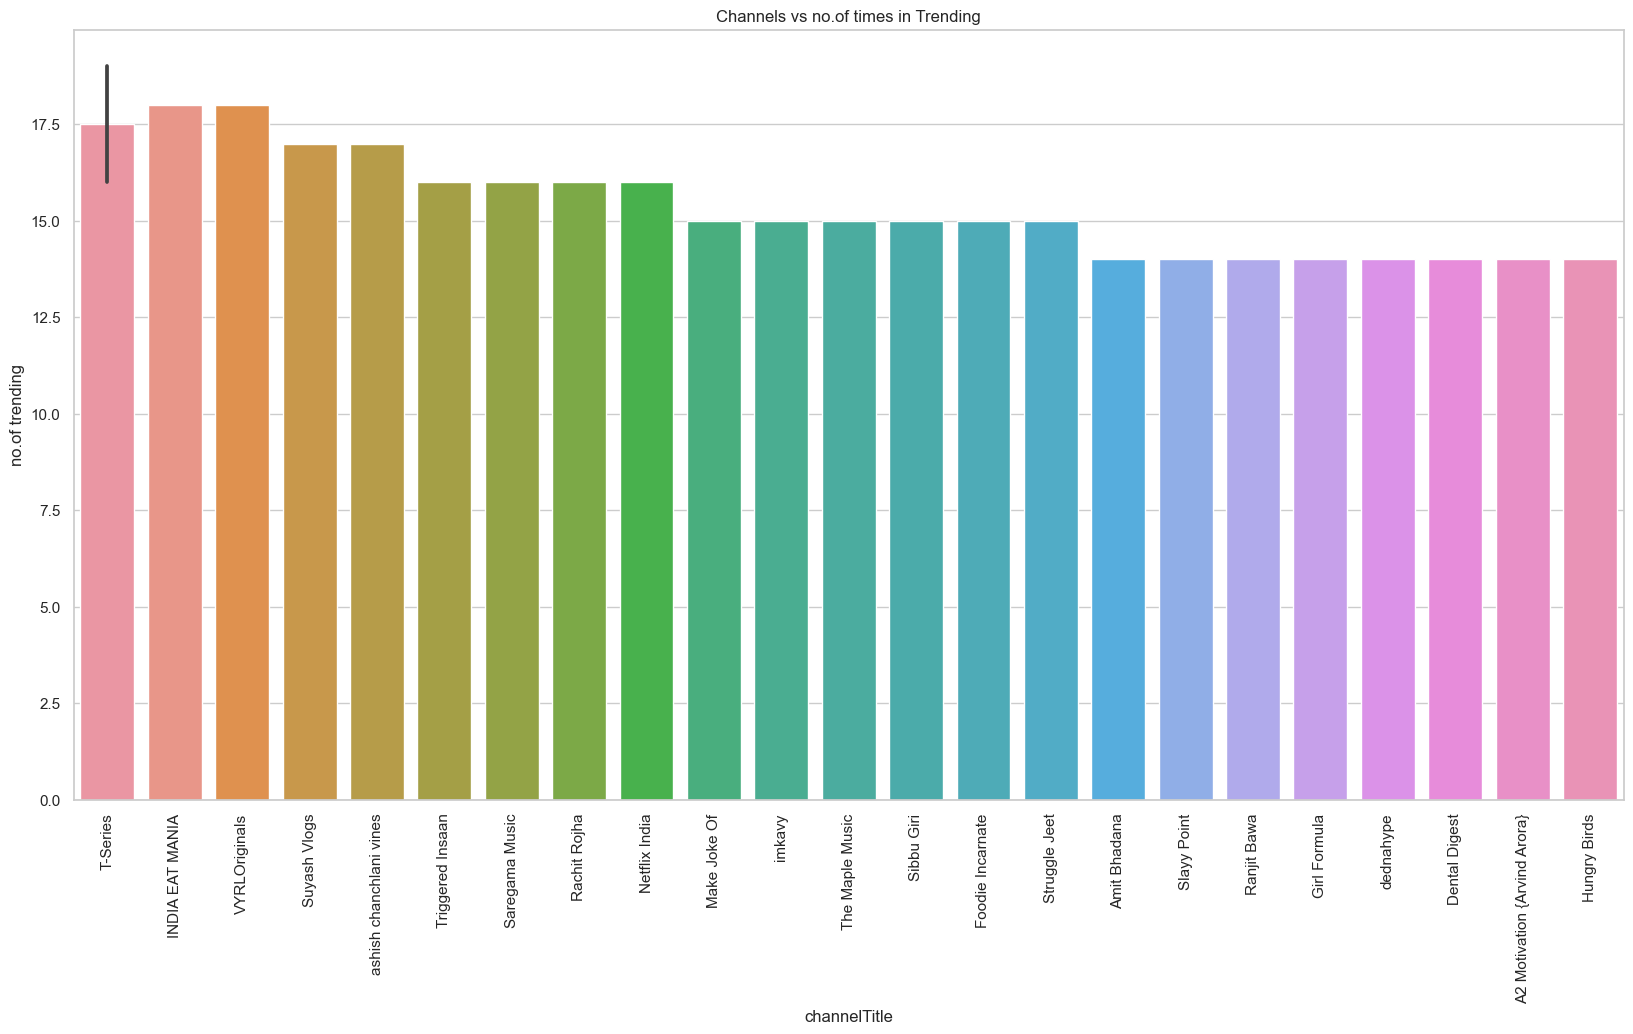

In [259]:
#Top 20 videos with most no.of times in trending(Channel wise)

# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("Channels vs no.of times in Trending")
plt.xlabel
plt.xticks(rotation=90)

sns.barplot(x=df_trend_video_tt.channelTitle, y=df_trend_video_tt.times_in_trending)
#sns.violinplot(x = df_trend_video_tt.channelTitle, y = df_minViews.DaysTakenToBeOnTrending )

# Add label for vertical axis
plt.ylabel("no.of trending")

Top 30 Channels whose Videos are in Trending

In [260]:
df_Channel_Trending = df_maxViews.groupby("channelTitle")["times_in_trending"].sum().reset_index()
df_Channel_Trending["Majority_Videos_Category_Type"] = df_maxViews.groupby('channelTitle')['Video_Category'].agg(pd.Series.mode).reset_index()["Video_Category"]
df_Channel_Trending = df_Channel_Trending.sort_values('times_in_trending', ascending=False).iloc[:30,:]
df_Channel_Trending 

,channelTitle,times_in_trending,Majority_Videos_Category_Type
3624,Vijay Television,1759,Foreign
3027,Sourav Joshi Vlogs,1203,Drama
698,Colors TV,1147,Foreign
3015,Sony SAB,1030,Foreign
3783,ZEE5,1024,Foreign
726,Crazy XYZ,963,Shorts
374,Asianet,882,Foreign
3238,Taarak Mehta Ka Ooltah Chashmah,747,Foreign
3174,T-Series,726,Comedy
697,Colors Rishtey,664,Foreign


<h3>Channel vs total no.of times in trending

Text(0, 0.5, 'no.of times in trending')

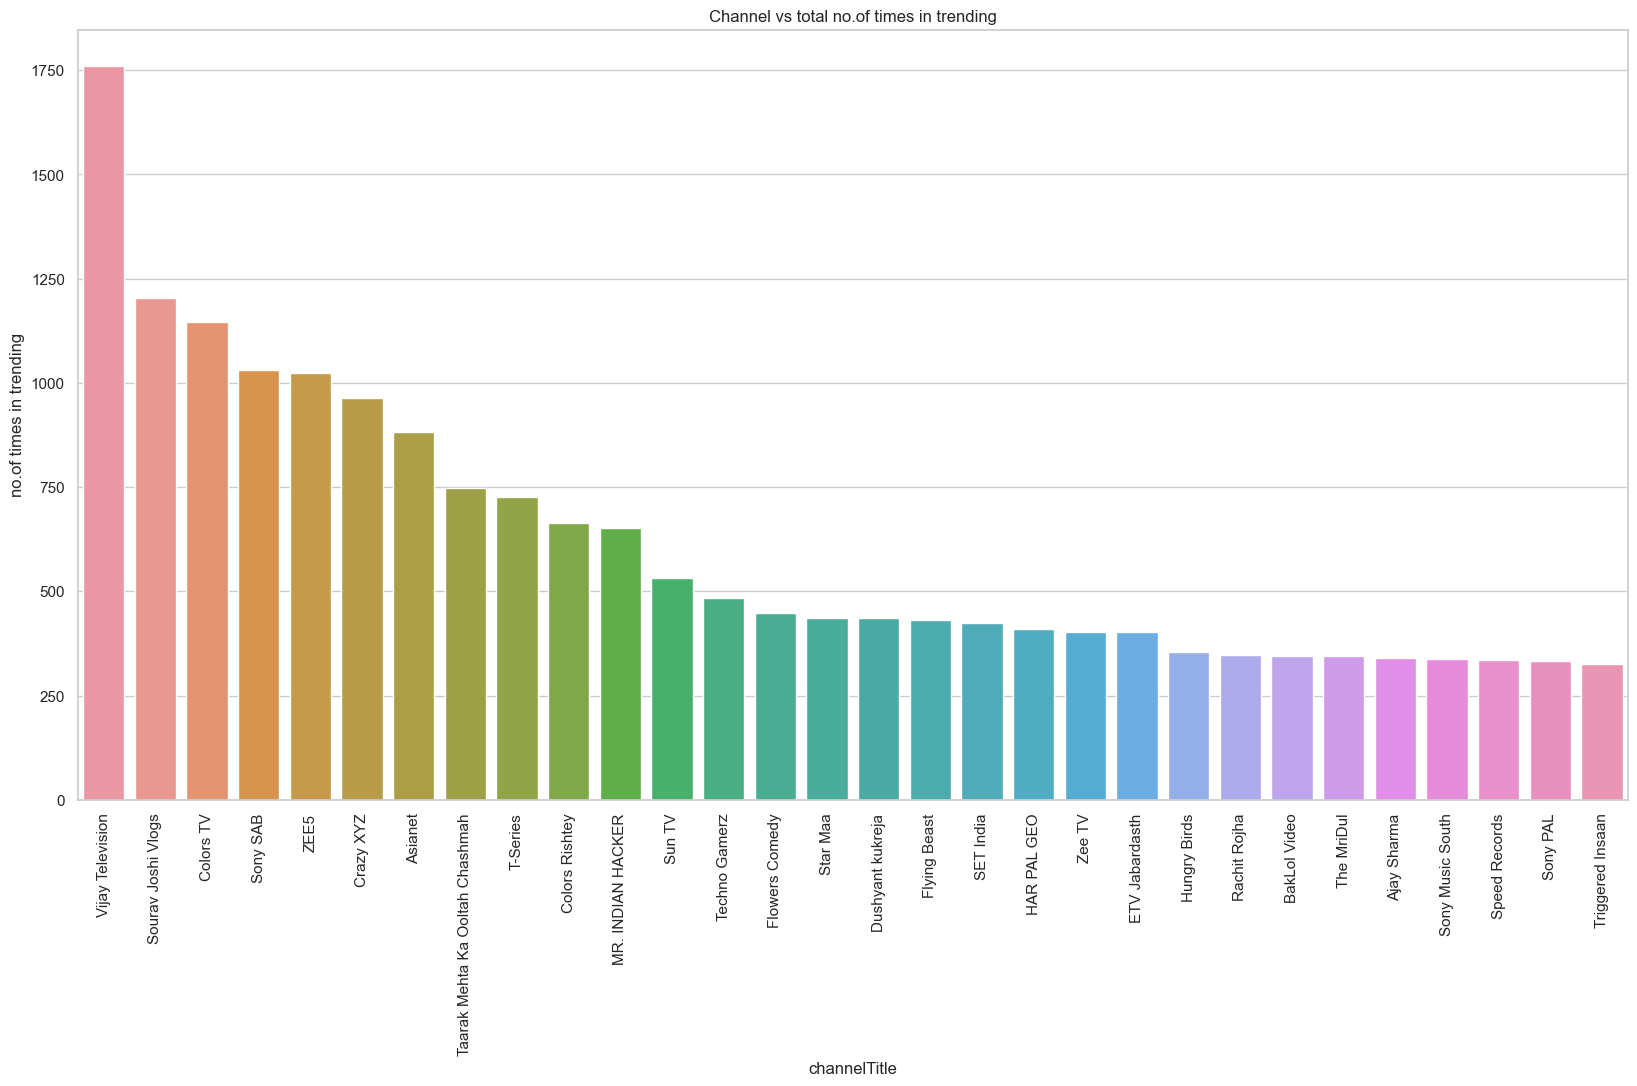

In [262]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("Channel vs total no.of times in trending")
plt.xlabel
plt.xticks(rotation=90)

sns.barplot(x=df_Channel_Trending.channelTitle, y=df_Channel_Trending.times_in_trending)

# Add label for vertical axis
plt.ylabel("no.of times in trending")

<h3>Category vs total no.of times in trending

Text(0, 0.5, 'no.of times in trending')

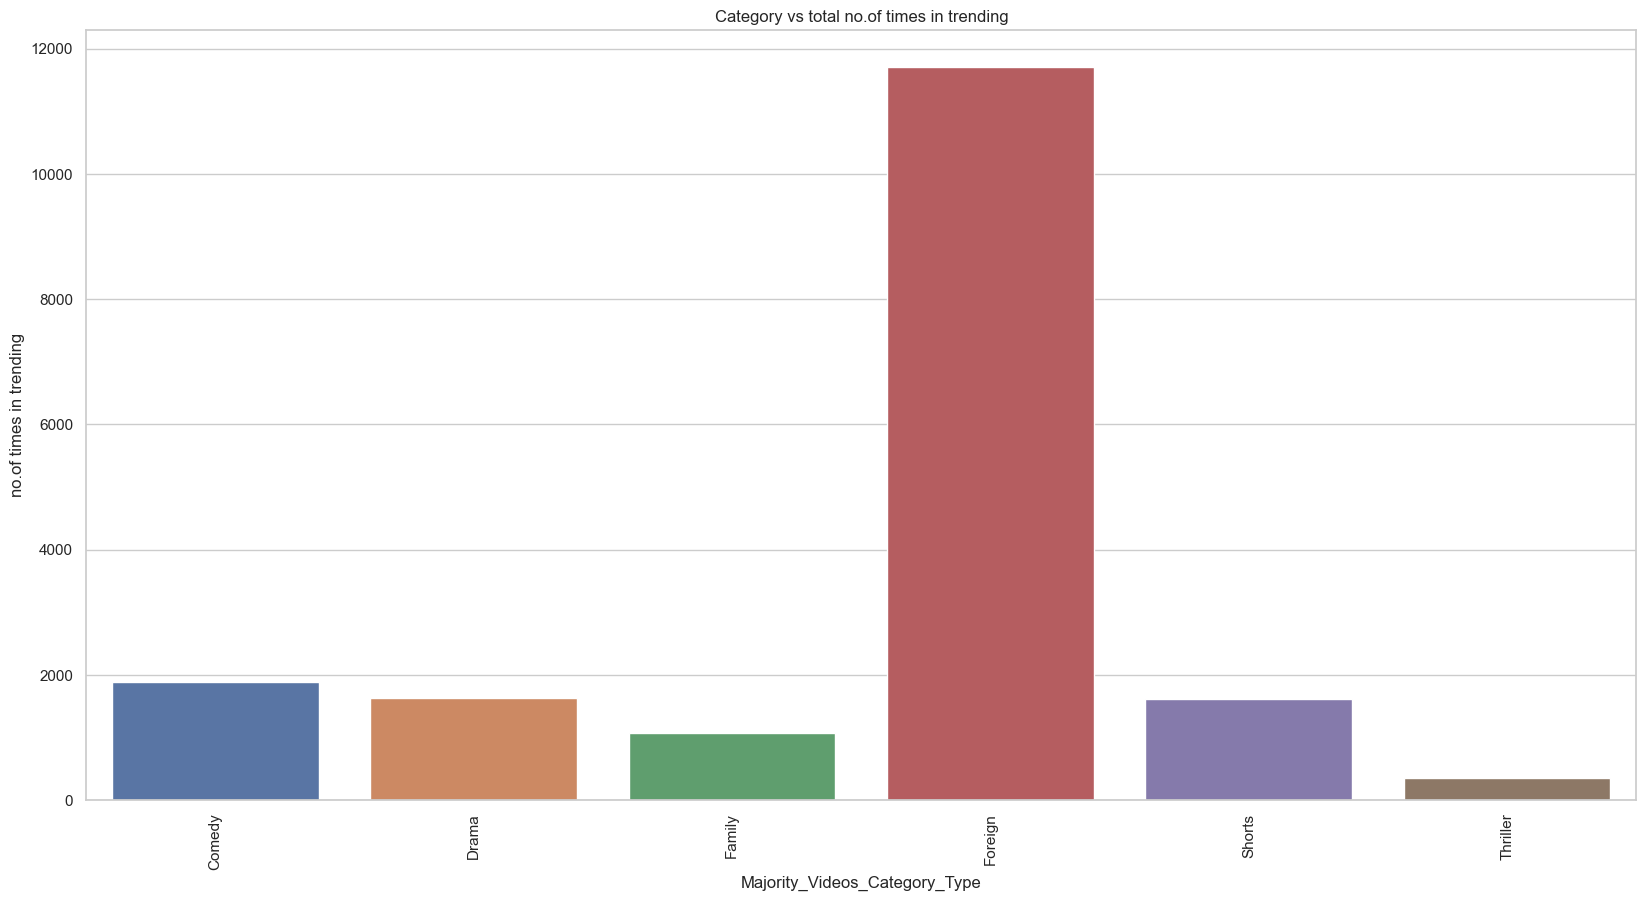

In [265]:
# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("Category vs total no.of times in trending")
plt.xlabel
plt.xticks(rotation=90)
Category_Trending = df_Channel_Trending.groupby("Majority_Videos_Category_Type")["times_in_trending"].sum().reset_index()
sns.barplot(x=Category_Trending.Majority_Videos_Category_Type, y=Category_Trending.times_in_trending)

# Add label for vertical axis
plt.ylabel("no.of times in trending")

Creating a column which calculates no.days took for the video to be in Trending. 0 being less than 24hrs

In [266]:
df_minViews.trending_date

47639    2021-04-27T00:00:00Z
74296    2021-09-09T00:00:00Z
98148    2022-01-09T00:00:00Z
17317    2020-11-11T00:00:00Z
2760     2020-08-26T00:00:00Z
                 ...         
60487    2021-06-29T00:00:00Z
51371    2021-05-21T00:00:00Z
27368    2021-01-08T00:00:00Z
63673    2021-07-15T00:00:00Z
55573    2021-06-09T00:00:00Z
Name: trending_date, Length: 46294, dtype: object

In [267]:
df_minViews["JoinedTrending"] = pd.to_datetime(df_minViews.trending_date.str.split(',\s*').str[0]) 
df_minViews["UploadedTime"] = pd.to_datetime(df_minViews.publishedAt.str.split(',\s*').str[0])
df_minViews["DaysTakenToBeOnTrending"] = (df_minViews["JoinedTrending"] - df_minViews["UploadedTime"]).dt.days
df_minViews['DaysTakenToBeOnTrending'] = df_minViews['DaysTakenToBeOnTrending'].apply(lambda x: 0 if x == -1 else x)
df_minViews.sample(10)

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,Video_Category,JoinedTrending,UploadedTime,DaysTakenToBeOnTrending
48812,HjLm9Gd294s,Scary Ghost DARES in our NEW HOME 😱 (SPOOKY),2021-05-04T07:47:32Z,Wanderers Hub,22,2021-05-05T00:00:00Z,ghost prank|horror prank|triggered insaan|fukr...,1738359,218422,3440,14878,False,False,"Hey guys, So, we did some horror dares our sub...",Drama,2021-05-05 00:00:00+00:00,2021-05-04 07:47:32+00:00,0
106119,tPqEjOkHAAQ,HOW JONATHAN DOMINATES IN TOURNAMENTS | SOLO 8...,2022-02-17T11:30:14Z,JONATHAN GAMING,20,2022-02-18T00:00:00Z,jonathan|jonathan gaming|esports|BGMI|BattleGr...,831110,124420,0,1948,False,False,"If you liked the Video don’t forget to Like, S...",Comedy,2022-02-18 00:00:00+00:00,2022-02-17 11:30:14+00:00,0
138950,7Zi7-MDjy_o,Samj gaye kya ap?😆😂#funny #shorts #comedy #ko...,2022-08-02T05:30:01Z,Koushal Monga,22,2022-08-03T00:00:00Z,[None],385103,18074,0,55,False,False,NaN,Drama,2022-08-03 00:00:00+00:00,2022-08-02 05:30:01+00:00,0
63197,Wvtqf3LEmBo,Flowers Uppum Mulakum | Episode 1067,2021-07-11T05:30:02Z,Uppum Mulakum,22,2021-07-12T00:00:00Z,[None],203676,5336,323,327,False,False,Emaster Digital Education Appജൂലൈ 15 ന് Launch...,Drama,2021-07-12 00:00:00+00:00,2021-07-11 05:30:02+00:00,0
92612,lFcUsccdq7U,Avinash Vs Anuja || Husband and Wife Biryani C...,2021-12-11T13:26:37Z,Mukku Avinash,24,2021-12-12T00:00:00Z,Avinash Vs Anuja|Husband and Wife Biryani Chal...,908469,28127,833,569,False,False,𝗕𝘂𝘆 𝗠𝗮𝗻 𝗠𝗮𝘁𝘁𝗲𝗿𝘀 𝗔𝗱𝘃𝗮𝗻𝗰𝗲𝗱 𝗛𝗮𝗶𝗿 𝗢𝗶𝗹 𝘄𝗶𝘁𝗵 𝗥𝗲𝗱𝗲𝗻𝘀𝘆...,Foreign,2021-12-12 00:00:00+00:00,2021-12-11 13:26:37+00:00,0
77308,0UqbNoums9w,🔴 Live | Channi ਨੇ Delhi ਕਿਉਂ ਲਾਈ ਸਾਰੀ ਰਾਤ? Ne...,2021-09-24T04:06:45Z,TV Punjab,25,2021-09-24T00:00:00Z,channi|channi bhangra|channisaab|bhangra|punja...,86430,1266,75,47,False,False,Why Punjab CM Charanjeet Singh Channi rushed t...,Horror,2021-09-24 00:00:00+00:00,2021-09-24 04:06:45+00:00,0
25076,RdQ563hOzM0,എൻഗേജ്മെന്റിനു ശേഷം മൃദുലയും യുവയും മാധ്യമങ്ങള...,2020-12-23T07:50:22Z,Indian Cinema Gallery,24,2020-12-25T00:00:00Z,mridula vijay|midhula vijai|yuva krishna|mridu...,1172769,22703,658,986,False,False,എൻഗേജ്മെന്റിനു ശേഷം മൃദുലയും യുവയും മാധ്യമങ്ങള...,Foreign,2020-12-25 00:00:00+00:00,2020-12-23 07:50:22+00:00,1
112058,IaHesoTuCS8,Cheese maggi popcorn 🍿 | 7 day popit challenge...,2022-03-19T11:30:06Z,Chahat Anand,22,2022-03-20T00:00:00Z,[None],130977,0,0,80,False,True,#chahatanand #latenightsnack #latenightfood #f...,Drama,2022-03-20 00:00:00+00:00,2022-03-19 11:30:06+00:00,0
84644,GzaCwk_NldI,Sauteli Maa aisi hoti hai Kya?🥺 The noodles gi...,2021-10-29T14:02:27Z,The noodles girl,22,2021-10-31T00:00:00Z,[None],697284,55980,1831,122,False,False,NaN,Drama,2021-10-31 00:00:00+00:00,2021-10-29 14:02:27+00:00,1
111415,mcOlZJZ1PEw,SHADOW - JASSA DHILLON | GUR SIDHU | PUNJABI SONG,2022-03-17T03:29:09Z,Brown Town Music,10,2022-03-17T00:00:00Z,Shadow|Shadow jassa dhillon|Jassa dhillon|Jass...,77422,5257,0,138,False,False,Brown Town Music & Nav Sandhu Presents Punjabi...,Comedy,2022-03-17 00:00:00+00:00,2022-03-17 03:29:09+00:00,0


Text(0, 0.5, 'Avg no.of days')

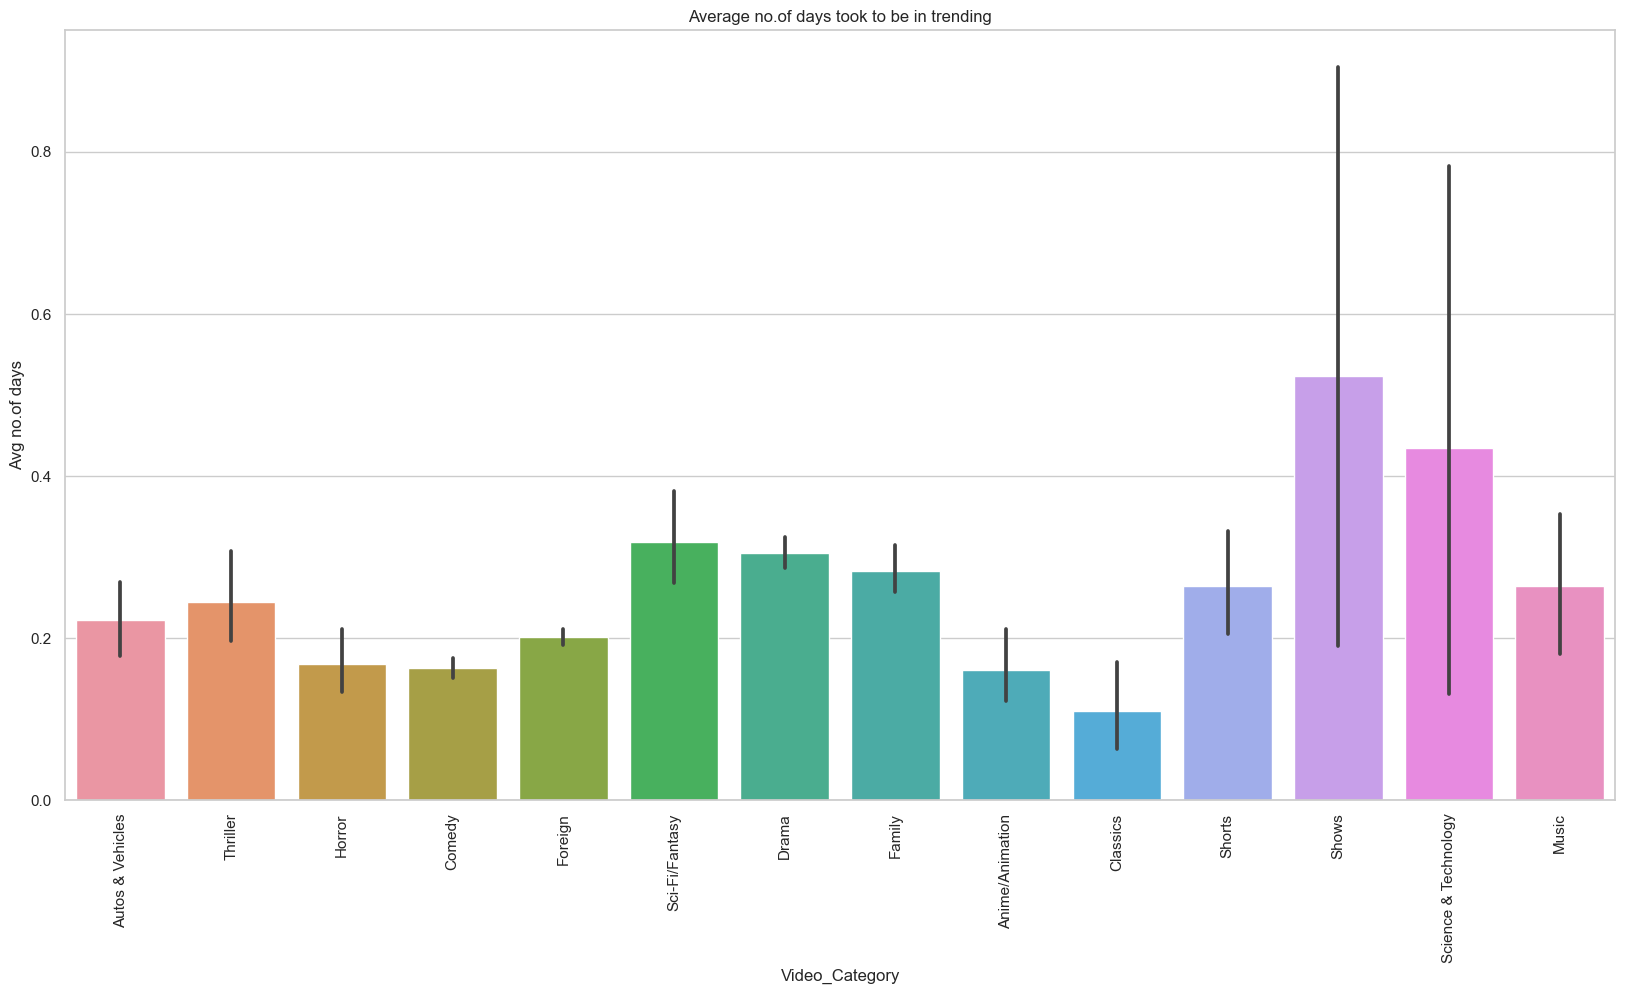

In [270]:
#Top 20 videos with most no.of times in trending(Channel wise)

# Set the width and height of the figure
plt.figure(figsize=(20,10))

# Add title
plt.title("Average no.of days took to be in trending")
plt.xlabel
plt.xticks(rotation=90)

sns.barplot(x=df_minViews.Video_Category, y=df_minViews['DaysTakenToBeOnTrending'])


# Add label for vertical axis
plt.ylabel("Avg no.of days")